# **CAPSTONE MODUL 2**
- **Name : Rafdiaufar Hazman**
- **Class : JCDS 2302**

## **Overview**
This data is about taxi trip record data based on NYC TLC Trip Record data within January 2023. This data explores taxi passenger behaviour and their preference when using taxi as their transportation in New York City. This data also explores the trends of the taxi services to find pattern within the trends.

## **Business Problem**
To maximize profit of taxi services, catering to what passenger needs is an important point for repeat business practices. Focusing to meet the needs of passenger will increase brand loyalty, customer retention, and customer satisfaction. In order to create business strategy that cater the needs of passenger, **Company wants to know what are the behaviour of passengers that have been taking their taxi service.**<br>
<br>
As a data analyst, we will try to answer these questions:

1. How is our passenger preference when using our taxi services?

## **Analysis Objective**
In order to answer business problem question, we will need to find several important points from the dataset and analyze it.
- Analysing passenger preference based on their pick up and drop off time to find pattern or trend to map out their behaviour when using our taxi services.
- Analysing passenger preferred pick-up and drop-off location when they decided to use our taxi services and find out which are the most popular locations.
- Analysing other variables that can reflects to passenger behaviour, such as trip preference, payment method, number of passenger on each trips, etc. 

## **Data Preparation**

### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

### **Import Datasets**

This analysis will be using two datasets in order to further explain pickup location and dropoff location for each trip.

In [2]:
df_tlc = pd.read_csv('NYC TLC Trip Record.csv', parse_dates=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])
zone = pd.read_csv('taxi_zone_lookup.csv')

In [3]:
df_tlc.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [4]:
zone.isna().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [5]:
zone.fillna('Unknown',inplace=True)
zone.tail()

,LocationID,Borough,Zone,service_zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,Unknown,Unknown
264,265,Unknown,Outside of NYC,Unknown


In [6]:
df = pd.merge(df_tlc,zone.add_prefix('PU'),'left',left_on='PULocationID',right_on='PULocationID')
df = pd.merge(df,zone.add_prefix('DO'),'left',left_on='DOLocationID',right_on='DOLocationID')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


### **Data Understanding**

```lpep_pickup_datetime``` and ```lpep_dropoff_datetime``` columns have Dtype object when they should be in datetime format. Which is why we need to change column Dtype when reading data by adding parse_dates=

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

### **Dataset Parameter Explanation**

1. `Vendor ID` = A code indicating the LPEP provider that provided the record.
2. `lpep_pickup_datetime` = The date and time when the meter was engaged.
3. `lpep_dropoff_datetime` = The date and time when the meter was disengaged.
4. `Passenger_count` = The number of passengers in the vehicle. This is a driver-entered value.
5. `Trip_distance` = The elapsed trip distance in miles was reported by the taximeter.
6. `PULocationID` = TLC Taxi Zone in which the taximeter was engaged.
7. `DOLocationID` = TLC Taxi Zone in which the taximeter was disengaged.
8. `RateCodeID` = The final rate code is in effect at the end of the trip.
9. `Store_and_fwd_flag` = This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
10. `Payment_type` = A numeric code signifying how the passenger paid for the trip.
11. `Fare_amount` = The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
12. `MTA_tax` = $0.50 MTA tax that is automatically triggered based on the metered rate in use.
13. `Improvement_surcharge` = $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.
14. `Tip_amount` = This field is automatically populated for credit card tips. Cash tips are not included.
15. `Tolls_amount` = The total amount of all tolls paid in the trip.
16. `Total_amount` = The total amount charged to passengers. Does not include cash tips.
17. `Trip_type` = A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.

## **Data Cleaning**

### **Duplicate Data**

In [8]:
df.duplicated().sum()

0

In [9]:
df.duplicated(subset=['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID']).sum()

174

When checked with overall data, there is no duplicate data in the dataset. But, there when checked with specific columns there are several duplicated rows that can be found. <br>Since this dataset is about Taxi Trip, it can be assumed that data with the same ```lpep_pickup_datetime``` and ```lpep_dropoff_datetime``` in the same ```PULocationID``` and ```DOLocationID``` is the same data.

In [10]:
df[df.duplicated(subset=['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID'], keep=False)].sort_values(by='lpep_pickup_datetime')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
899,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,NaN,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,2.5,0.5,0.5,0.0,0.0,NaN,0.3,3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,NaN,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone
63808,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,3.7,1.0,0.5,0.0,0.0,NaN,1.0,6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone
63868,2,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5.0,264,264,1.0,0.00,-10.0,0.0,0.0,0.0,0.0,NaN,-1.0,-11.0,4.0,2.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


After exploring the duplicated data, it can be seen that the first set of duplicated data has negative value on some columns while the second set of data has positive value.<br>
Since the data is about the amount fare paid by the passenger, it makes more sense to keep the positive value data and drop the negative value data.

In [11]:
df_duplicate = df[df.duplicated(subset=['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID'], keep=False)].sort_values(by='lpep_pickup_datetime')

In [12]:
df_duplicate[df_duplicate['total_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,NaN,-1.0,-11.1,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-5.3,4.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,NaN,-1.0,-5.2,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,NaN,-1.0,-7.0,4.0,1.0,0.0,Queens,Jamaica,Boro Zone,Queens,Jamaica,Boro Zone
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,NaN,-1.0,-7.0,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,NaN,-1.0,-6.2,3.0,1.0,0.0,Brooklyn,Williamsburg (South Side),Boro Zone,Brooklyn,Williamsburg (South Side),Boro Zone


In [13]:
df.drop(index=df_duplicate[df_duplicate['total_amount'] < 0].index,inplace=True)

In [14]:
df.duplicated(subset=['lpep_pickup_datetime','lpep_dropoff_datetime','PULocationID','DOLocationID']).sum()

0

### **Missing Value**

In [15]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68037
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
PUBorough                    0
PUZone                       0
PUservice_zone               0
DOBorough                    0
DOZone                       0
DOservice_zone               0
dtype: int64

- `ehail_fee` column is completely empty in the entire rows. This means the columns can be safely removed because there is no impact to the dataset

In [16]:
df.drop(columns='ehail_fee', inplace=True)

In [17]:
df[df['store_and_fwd_flag'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN,Queens,Astoria,Boro Zone,Brooklyn,Bedford,Boro Zone
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN,Brooklyn,Bushwick South,Boro Zone,Brooklyn,Bushwick South,Boro Zone
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN,Brooklyn,East Williamsburg,Boro Zone,Queens,Astoria,Boro Zone
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,NaN,NaN,NaN,Bronx,Mount Hope,Boro Zone,Manhattan,Central Harlem North,Boro Zone
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN,Manhattan,Central Harlem North,Boro Zone,Manhattan,Yorkville East,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


In [18]:
len(df[df['store_and_fwd_flag'].isna()])/len(df) * 100

6.355365462909887

- A total of 4324 rows (6.35% of total data) have a null value on `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge`. This data can be filled with median or most frequent data in the dataset

Before filling the missing value for each columns, the data in each columns will be explored to see if the columns can be dropped or not

`store_and_fwd_flag` = This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

In [19]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    63405
Y      308
Name: count, dtype: int64

`store_and_fwd_flag` doesn't have any significance for the analysis, so it will be better to drop the columns in order to focus more on relevant data in the dataset

In [20]:
df.drop(columns='store_and_fwd_flag', inplace=True)

`RatecodeID` = The final rate code is in effect at the end of the trip.<br>
- 1 = Standard rate
- 2 = JFK
- 3 = Newark
- 4 = Nassau or Westchester
- 5 = Negotiated fare
- 6 = Group ride

In [21]:
print('RatecodeID median :', df['RatecodeID'].median())
df['RatecodeID'].value_counts()

RatecodeID median : 1.0


RatecodeID
1.0     61940
5.0      1520
2.0       156
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

After exploring the data for `RatecodeID`, it can be concluded that the `RatecodeID` is 2 if the `DOLocationID` is 132 (JFK Airport), `RatecodeID` is 3 if `DOLocationID` is 1 (Newark Airport), `RatecodeID` is 4 if `DOLocationID` is 265 (Outside of NYC), and the rest of the data will be filled with median of `RatecodeID` which is 1.
<br><br>
For `RatecodeID` with value of 99, it will be treated as null value and will be filled according to above method.

In [22]:
df['RatecodeID'].replace(99, np.nan,inplace=True)
df.loc[(df['DOLocationID'] == 132) & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['DOLocationID'] == 1) & (df['RatecodeID'].isna()), 'RatecodeID'] = 3
df.loc[(df['DOLocationID'] == 265) & (df['RatecodeID'].isna()), 'RatecodeID'] = 4

In [23]:
df['RatecodeID'].fillna(1,inplace=True)

In [24]:
df[df['RatecodeID'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone


In [25]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    66144
5.0     1520
2.0      264
4.0       75
3.0       34
Name: count, dtype: int64

`passenger_count` = The number of passengers in the vehicle. This is a driver-entered value.

In [26]:
print('passenger_count median :', df['passenger_count'].median())
df['passenger_count'].value_counts()

passenger_count median : 1.0


passenger_count
1.0    54174
2.0     5061
5.0     1768
6.0     1053
3.0      951
4.0      362
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

Because there is no way to know the number of passenger using data from other columns, `passenger_count` with null values will be replaced with median

In [27]:
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

In [28]:
print('passenger_count null value :', df['passenger_count'].isna().sum())
df['passenger_count'].value_counts()

passenger_count null value : 0


passenger_count
1.0    58498
2.0     5061
5.0     1768
6.0     1053
3.0      951
4.0      362
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

`payment_type` = A numeric code signifying how the passenger paid for the trip.
- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

In [29]:
print('payment_type null value :', df['payment_type'].isna().sum())
df['payment_type'].value_counts()

payment_type null value : 4324


payment_type
1.0    40686
2.0    22629
3.0      333
4.0       63
5.0        2
Name: count, dtype: int64

Based on `tip_amount` column description, it can be concluded that any rows with `tip_amount` higher than 0 is paid using credit cards. the rest of the data will be filled with unknown payment type

In [30]:
df[(df['tip_amount'] > 0) & (df['payment_type'].isna())]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,1.0,7,17,1.0,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,NaN,NaN,NaN,Queens,Astoria,Boro Zone,Brooklyn,Bedford,Boro Zone
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,1.0,37,37,1.0,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,NaN,NaN,NaN,Brooklyn,Bushwick South,Boro Zone,Brooklyn,Bushwick South,Boro Zone
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,1.0,80,7,1.0,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,NaN,NaN,NaN,Brooklyn,East Williamsburg,Boro Zone,Queens,Astoria,Boro Zone
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,1.0,42,262,1.0,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,NaN,NaN,NaN,Manhattan,Central Harlem North,Boro Zone,Manhattan,Yorkville East,Yellow Zone
63892,2,2023-01-01 00:30:00,2023-01-01 01:01:00,1.0,7,61,1.0,15.43,55.53,0.0,0.0,16.96,0.0,1.0,73.49,NaN,NaN,NaN,Queens,Astoria,Boro Zone,Brooklyn,Crown Heights North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,1.0,42,236,1.0,2.26,14.62,0.0,0.0,3.31,0.0,1.0,21.68,NaN,NaN,NaN,Manhattan,Central Harlem North,Boro Zone,Manhattan,Upper East Side North,Yellow Zone
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,1.0,75,186,1.0,3.92,20.72,0.0,0.0,1.25,0.0,0.3,25.02,NaN,NaN,NaN,Manhattan,East Harlem South,Boro Zone,Manhattan,Penn Station/Madison Sq West,Yellow Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


In [31]:
df.loc[(df['tip_amount'] > 0) & (df['payment_type'].isna()), 'payment_type'] = 1

In [32]:
df['payment_type'].fillna(5,inplace=True)

In [33]:
print('payment_type null value :', df['payment_type'].isna().sum())
df['payment_type'].value_counts()

payment_type null value : 0


payment_type
1.0    44517
2.0    22629
5.0      495
3.0      333
4.0       63
Name: count, dtype: int64

`trip_type` = A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
- 1 = Street-hail
- 2 = Dispatch

In [34]:
print('trip_type median value :',df['trip_type'].median())
print('trip_type null value :', df['trip_type'].isna().sum())
df['trip_type'].value_counts()

trip_type median value : 1.0
trip_type null value : 4334


trip_type
1.0    62310
2.0     1393
Name: count, dtype: int64

Because there is no way to know `trip_type` based on other columns, the null value will be filled with median

In [35]:
df['trip_type'].fillna(df['trip_type'].median(),inplace=True)

In [36]:
print('trip_type null value :', df['trip_type'].isna().sum())
df['trip_type'].value_counts()

trip_type null value : 0


trip_type
1.0    66644
2.0     1393
Name: count, dtype: int64

`congestion_surcharge` = Total amount collected in trip for NYS congestion surcharge

In [37]:
print('congestion_surcharge median value :',df['congestion_surcharge'].median())
print('congestion_surcharge null value :', df['congestion_surcharge'].isna().sum())
df['congestion_surcharge'].value_counts()

congestion_surcharge median value : 0.0
congestion_surcharge null value : 4324


congestion_surcharge
0.00    46825
2.75    16872
2.50       16
Name: count, dtype: int64

Because there is no way to know `congestion_surcharge` based on other columns, the null value will be filled with median

In [38]:
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(),inplace=True)

In [39]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
PUBorough                0
PUZone                   0
PUservice_zone           0
DOBorough                0
DOZone                   0
DOservice_zone           0
dtype: int64

### **Data Anomaly, Outliers, and Formating**

In order to focus more on answering problem statement, columns that are not needed for further analysis will be dropped.

- `VendorID` will be dropped because there is no need to see which vendor used.
- `extra`, `mta_tax`, `improvement_surcharge`, `total_amount` will be dropped because we will use `fare amount` for analysis as the base price.
- `PUservice_zone` and `DOservice_zone` will be dropped because it is a redundant data and we will be using Borough and Zone for location.

In [40]:
df.drop(columns=['VendorID', 'extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'PUservice_zone', 'DOservice_zone'], inplace=True)

In [41]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.9,4.03,0.0,1.0,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.7,2.64,0.0,1.0,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.2,1.94,0.0,1.0,1.0,0.00,Queens,Steinway,Queens,Old Astoria
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.5,1.70,0.0,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.0,0.00,0.0,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North


#### `lpep_pickup_datetime` & `lpep_dropoff_datetime`

In [42]:
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 68037 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   68037 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  68037 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.6 MB


The date range for this data set is between 1st January 2023 until 31st January 2023. Any other date will be treated as outliers and will be dropped.

In [43]:
df[(df['lpep_pickup_datetime'].dt.month != 1) | (df['lpep_pickup_datetime'].dt.year != 2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,0.00,2.0,1.0,0.00,Queens,Astoria,Queens,Corona
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,6.55,2.0,1.0,2.75,Queens,Woodside,Manhattan,Midtown South
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,0.00,1.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,0.00,1.0,2.0,0.00,Queens,Elmhurst,Queens,Ridgewood


In [44]:
df.drop(index=df[(df['lpep_pickup_datetime'].dt.month != 1) | (df['lpep_pickup_datetime'].dt.year != 2023)].index, inplace=True)

Using this date range, we will create some features to help with the analysis:
- `trip_duration` = The amount of time needed for the trip from pickup location until dropoff location
- `trip_day` = Day name when passenger ride for the trip
- `trip_hour` = Hour when passenger ride for the trip

In [45]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60
df['trip_duration']

0        11.016667
1         6.766667
2         6.333333
3         5.816667
4         5.966667
           ...    
68206    13.000000
68207     8.000000
68208    16.000000
68209    18.000000
68210    16.000000
Name: trip_duration, Length: 68033, dtype: float64

In [46]:
df['trip_duration'].describe()

count    68033.000000
mean        18.124391
std         74.945090
min          0.000000
25%          7.233333
50%         11.416667
75%         17.516667
max       1439.883333
Name: trip_duration, dtype: float64

Data for `trip_duration` cannot be use as it is because it still have an anomaly and extreme outliers which will be handled.

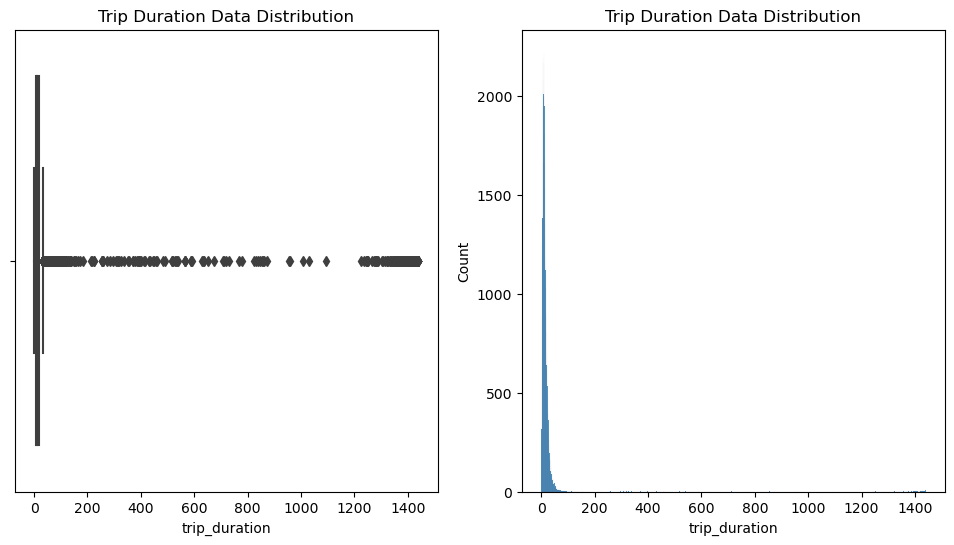

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Trip Duration Data Distribution')
sns.boxplot(data=df, x='trip_duration');
plt.subplot(1,2,2)
plt.title('Trip Duration Data Distribution')
sns.histplot(data=df, x='trip_duration');

`trip_duration` with less than 2 minutes will be concluded as a voided trip where the passenger cancelled the taxi trip. As such, the rows will be dropped to improve the accuracy of the data.

In [48]:
df[df['trip_duration'] < 2]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration
35,2023-01-01 00:41:53,2023-01-01 00:41:58,1.0,83,83,1.0,6.70,3.00,0.00,0.0,3.0,1.0,0.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,0.083333
99,2023-01-01 01:27:36,2023-01-01 01:27:43,5.0,168,168,0.0,0.00,20.00,0.00,0.0,1.0,2.0,0.0,Bronx,Mott Haven/Port Morris,Bronx,Mott Haven/Port Morris,0.116667
104,2023-01-01 01:11:01,2023-01-01 01:11:06,5.0,179,179,2.0,0.01,190.00,0.00,0.0,2.0,2.0,0.0,Queens,Old Astoria,Queens,Old Astoria,0.083333
107,2023-01-01 01:11:13,2023-01-01 01:11:36,1.0,7,7,1.0,0.00,3.00,9.00,0.0,1.0,1.0,0.0,Queens,Astoria,Queens,Astoria,0.383333
115,2023-01-01 01:52:58,2023-01-01 01:53:00,1.0,264,264,1.0,0.00,3.00,21.50,0.0,1.0,1.0,0.0,Unknown,Unknown,Unknown,Unknown,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67478,2023-01-26 12:09:00,2023-01-26 12:10:00,1.0,17,225,1.0,0.02,25.81,7.71,0.0,1.0,1.0,0.0,Brooklyn,Bedford,Brooklyn,Stuyvesant Heights,1.000000
67951,2023-01-30 03:58:00,2023-01-30 03:59:00,1.0,83,83,1.0,0.00,14.41,0.00,0.0,5.0,1.0,0.0,Queens,Elmhurst/Maspeth,Queens,Elmhurst/Maspeth,1.000000
67982,2023-01-30 09:09:00,2023-01-30 09:10:00,1.0,7,193,1.0,0.23,13.30,2.86,0.0,1.0,1.0,0.0,Queens,Astoria,Queens,Queensbridge/Ravenswood,1.000000
68100,2023-01-31 08:49:00,2023-01-31 08:50:00,1.0,127,127,1.0,0.03,15.21,3.24,0.0,1.0,1.0,0.0,Manhattan,Inwood,Manhattan,Inwood,1.000000


In [49]:
df.drop(index=df[df['trip_duration'] < 2].index, inplace=True)

In the same case, `trip_duration` with more than 300 minutes will be concluded as extreme outliers and will be dropped to improve accuracy of the data.

In [50]:
df[df['trip_duration'] > 300]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration
49,2023-01-01 00:23:04,2023-01-01 23:18:32,1.0,255,48,1.0,8.55,47.8,5.30,0.0,1.0,1.0,2.75,Brooklyn,Williamsburg (North Side),Manhattan,Clinton East,1375.466667
108,2023-01-01 01:53:59,2023-01-02 00:00:00,1.0,260,223,1.0,2.64,14.9,0.00,0.0,1.0,1.0,0.00,Queens,Woodside,Queens,Steinway,1326.016667
118,2023-01-01 01:25:46,2023-01-02 00:29:15,1.0,129,37,1.0,6.53,31.0,0.00,0.0,2.0,1.0,0.00,Queens,Jackson Heights,Brooklyn,Bushwick South,1383.483333
207,2023-01-01 03:12:42,2023-01-02 02:03:43,5.0,129,129,1.0,0.72,20.0,6.09,0.0,1.0,2.0,0.00,Queens,Jackson Heights,Queens,Jackson Heights,1371.016667
262,2023-01-01 04:03:36,2023-01-02 03:31:50,1.0,65,37,5.0,3.61,20.5,0.00,0.0,2.0,1.0,0.00,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Bushwick South,1408.233333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62591,2023-01-31 13:58:22,2023-02-01 11:46:10,1.0,130,130,1.0,0.10,3.7,0.00,0.0,2.0,1.0,0.00,Queens,Jamaica,Queens,Jamaica,1307.800000
62653,2023-01-31 13:57:30,2023-02-01 10:49:04,1.0,244,43,3.0,5.74,31.0,0.00,0.0,1.0,1.0,2.75,Manhattan,Washington Heights South,Manhattan,Central Park,1251.566667
62762,2023-01-31 15:21:47,2023-02-01 00:00:00,1.0,92,64,2.0,9.15,39.4,4.09,0.0,1.0,1.0,0.00,Queens,Flushing,Queens,Douglaston,518.216667
63105,2023-01-31 17:45:46,2023-02-01 17:27:05,1.0,43,151,1.0,0.75,5.8,2.45,0.0,1.0,1.0,0.00,Manhattan,Central Park,Manhattan,Manhattan Valley,1421.316667


In [51]:
df.drop(index=df[df['trip_duration'] > 300].index, inplace=True)

In [52]:
df['trip_duration'].describe()

count    65645.000000
mean        14.262072
std         10.737920
min          2.000000
25%          7.616667
50%         11.683333
75%         17.700000
max        296.300000
Name: trip_duration, dtype: float64

After handling outliers in `trip_duration`, we will continue adding new features which are `trip_day` and `trip_hour`

In [53]:
df['trip_day'] = df['lpep_pickup_datetime'].dt.day_name().astype('category').cat.reorder_categories(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)

In [54]:
df['trip_day']

0         Sunday
1         Sunday
2         Sunday
3         Sunday
4         Sunday
          ...   
68206    Tuesday
68207    Tuesday
68208    Tuesday
68209    Tuesday
68210    Tuesday
Name: trip_day, Length: 65645, dtype: category
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [55]:
df['trip_day'].value_counts()

trip_day
Tuesday      10846
Thursday      9867
Friday        9648
Monday        9608
Wednesday     9538
Saturday      8171
Sunday        7967
Name: count, dtype: int64

In [56]:
df['trip_hour'] = df['lpep_pickup_datetime'].dt.hour

In [57]:
df['trip_hour'].value_counts()

trip_hour
18    5087
17    5052
16    5038
15    4930
14    4241
19    4089
13    3860
12    3653
11    3585
10    3514
9     3406
20    3128
8     3122
7     2576
21    2310
22    1821
23    1447
0     1071
6      967
1      831
2      593
3      522
5      401
4      401
Name: count, dtype: int64

#### `RatecodeID`

- 1 = Standard rate
- 2 = JFK
- 3 = Newark
- 4 = Nassau or Westchester
- 5 = Negotiated fare
- 6 = Group ride

In [58]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    64586
5.0      740
2.0      228
4.0       71
3.0       20
Name: count, dtype: int64

Outliers & Anomaly in `RatecodeID` has been cleaned in previous section. Here, `RatecodeID` will be formatted into category and changed into their corresponding string data.

In [59]:
def rate_str(x):
    if x == 1:
        return 'Standard Rate'
    elif x == 2:
        return 'JFK'
    elif x == 3:
        return 'Newark'
    elif x == 4:
        return 'Nassau or Westchester'
    else:
        return 'Negotiated Fare'

In [60]:
df['RatecodeID'] = df['RatecodeID'].apply(rate_str).astype('category')

In [61]:
df['RatecodeID']

0        Standard Rate
1        Standard Rate
2        Standard Rate
3        Standard Rate
4        Standard Rate
             ...      
68206    Standard Rate
68207    Standard Rate
68208    Standard Rate
68209    Standard Rate
68210    Standard Rate
Name: RatecodeID, Length: 65645, dtype: category
Categories (5, object): ['JFK', 'Nassau or Westchester', 'Negotiated Fare', 'Newark', 'Standard Rate']

#### `passenger_count`

According to NYC TLC Rules, the maximum amount of passenger allowed in one taxi is 5 people. With the exception of additional passenger under the age of seven. This means the maximum number of passenger will be 6, and above it will be dropped.

In [62]:
print('passenger_count median value :',df['passenger_count'].median())
df['passenger_count'].value_counts()

passenger_count median value : 1.0


passenger_count
1.0    56489
2.0     4843
5.0     1733
6.0     1030
3.0      911
4.0      353
0.0      284
7.0        2
Name: count, dtype: int64

In [63]:
df[df['passenger_count'] > 6]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour
26827,2023-01-14 10:41:55,2023-01-14 11:03:50,Negotiated Fare,121,95,7.0,6.38,27.5,4.0,0.0,1.0,2.0,0.0,Queens,Hillcrest/Pomonok,Queens,Forest Hills,21.916667,Saturday,10
44134,2023-01-22 20:11:06,2023-01-22 20:40:23,Negotiated Fare,130,52,7.0,15.13,70.0,14.2,0.0,1.0,2.0,0.0,Queens,Jamaica,Brooklyn,Cobble Hill,29.283333,Sunday,20


In [64]:
df.drop(index=df[df['passenger_count'] > 6].index, inplace=True)

There are still data anomaly within `passenger_count` where the value is 0. This value will be treated as null value and will be replaced with median value.

In [65]:
df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1

In [66]:
df['passenger_count'].value_counts()

passenger_count
1.0    56773
2.0     4843
5.0     1733
6.0     1030
3.0      911
4.0      353
Name: count, dtype: int64

#### `trip_distance`

`trip_distance` has extreme outliers that needs to be removed. In this case, any trip above 100 miles will be removed because the range is too far than other trips

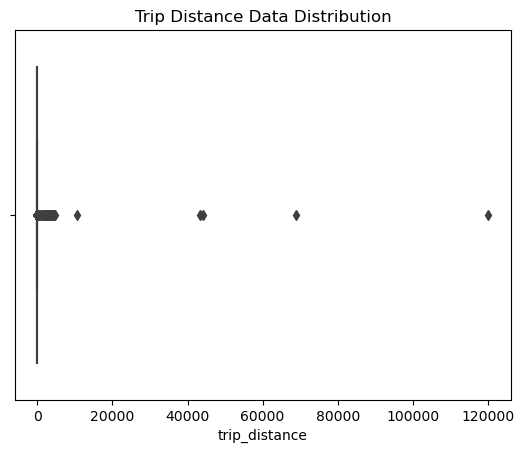

In [67]:
plt.title('Trip Distance Data Distribution')
sns.boxplot(data=df, x='trip_distance');

In [68]:
df[df['trip_distance'] > 100]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour
33373,2023-01-17 18:40:38,2023-01-17 19:04:45,Negotiated Fare,82,236,1.0,1571.97,29.97,3.04,6.55,1.0,1.0,2.75,Queens,Elmhurst,Manhattan,Upper East Side North,24.116667,Tuesday,18
63995,2023-01-01 12:35:00,2023-01-01 12:58:00,Standard Rate,181,137,1.0,579.63,28.49,4.84,0.00,1.0,1.0,0.00,Brooklyn,Park Slope,Manhattan,Kips Bay,23.000000,Sunday,12
64446,2023-01-05 08:39:00,2023-01-05 08:58:00,Standard Rate,193,140,1.0,2555.47,23.68,0.49,0.00,1.0,1.0,0.00,Queens,Queensbridge/Ravenswood,Manhattan,Lenox Hill East,19.000000,Thursday,8
64558,2023-01-05 17:21:00,2023-01-05 17:26:00,Standard Rate,49,65,1.0,3077.89,12.02,4.00,0.00,1.0,1.0,0.00,Brooklyn,Clinton Hill,Brooklyn,Downtown Brooklyn/MetroTech,5.000000,Thursday,17
64572,2023-01-05 18:07:00,2023-01-05 18:13:00,Standard Rate,193,193,1.0,2606.52,11.00,1.20,0.00,1.0,1.0,0.00,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood,6.000000,Thursday,18
64609,2023-01-06 07:27:00,2023-01-06 07:30:00,Standard Rate,41,74,1.0,43392.12,12.02,2.60,0.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,3.000000,Friday,7
64695,2023-01-06 14:16:00,2023-01-06 14:59:00,Standard Rate,82,130,1.0,137.95,44.90,4.04,0.00,1.0,1.0,0.00,Queens,Elmhurst,Queens,Jamaica,43.000000,Friday,14
64947,2023-01-08 23:47:00,2023-01-08 23:59:00,Standard Rate,52,79,1.0,2446.53,23.89,4.34,0.00,1.0,1.0,0.00,Brooklyn,Cobble Hill,Manhattan,East Village,12.000000,Sunday,23
64954,2023-01-09 04:28:00,2023-01-09 04:46:00,Standard Rate,119,20,1.0,2027.31,20.64,1.00,0.00,1.0,1.0,0.00,Bronx,Highbridge,Bronx,Belmont,18.000000,Monday,4
65149,2023-01-10 15:40:00,2023-01-10 16:24:00,Standard Rate,26,37,1.0,1082.45,49.80,0.95,0.00,1.0,1.0,0.00,Brooklyn,Borough Park,Brooklyn,Bushwick South,44.000000,Tuesday,15


In [69]:
df.drop(index=df[df['trip_distance'] > 100].index, inplace=True)

`trip_distance` below 0.62 miles (1 km) will also be dropped from the dataset because it is concluded to be voided trip since the distance is too small.

In [70]:
df[df['trip_distance'] < 0.62]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour
2,2023-01-01 00:35:12,2023-01-01 00:41:32,Standard Rate,223,179,1.0,0.00,7.20,1.94,0.0,1.0,1.0,0.0,Queens,Steinway,Queens,Old Astoria,6.333333,Sunday,0
21,2023-01-01 00:41:56,2023-01-01 00:46:06,Standard Rate,42,42,1.0,0.53,5.80,0.00,0.0,2.0,1.0,0.0,Manhattan,Central Harlem North,Manhattan,Central Harlem North,4.166667,Sunday,0
58,2023-01-01 00:57:15,2023-01-01 01:00:15,Standard Rate,75,75,1.0,0.00,4.40,1.38,0.0,1.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem South,3.000000,Sunday,0
70,2023-01-01 01:22:35,2023-01-01 01:25:11,Standard Rate,42,116,1.0,0.60,5.10,0.00,0.0,2.0,1.0,0.0,Manhattan,Central Harlem North,Manhattan,Hamilton Heights,2.600000,Sunday,1
82,2023-01-01 01:03:59,2023-01-01 01:07:17,Standard Rate,75,74,1.0,0.53,5.80,0.00,0.0,2.0,1.0,0.0,Manhattan,East Harlem South,Manhattan,East Harlem North,3.300000,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68172,2023-01-31 16:03:00,2023-01-31 16:06:00,Standard Rate,41,42,1.0,0.43,15.21,3.24,0.0,1.0,1.0,0.0,Manhattan,Central Harlem,Manhattan,Central Harlem North,3.000000,Tuesday,16
68177,2023-01-31 16:41:00,2023-01-31 16:52:00,Standard Rate,74,74,1.0,0.51,15.21,2.43,0.0,1.0,1.0,0.0,Manhattan,East Harlem North,Manhattan,East Harlem North,11.000000,Tuesday,16
68178,2023-01-31 17:48:00,2023-01-31 18:00:00,Standard Rate,37,17,1.0,0.59,14.40,2.00,0.0,1.0,1.0,0.0,Brooklyn,Bushwick South,Brooklyn,Bedford,12.000000,Tuesday,17
68193,2023-01-31 18:17:00,2023-01-31 18:20:00,Standard Rate,146,7,1.0,0.45,14.40,1.54,0.0,1.0,1.0,0.0,Queens,Long Island City/Queens Plaza,Queens,Astoria,3.000000,Tuesday,18


In [71]:
df.drop(index=df[df['trip_distance'] < 0.62].index, inplace=True)

Using `trip_distance` and `trip_duration` we can create a new feature for further analysis :
- `taxi_speed` = driving speed for taxi in NYC (mph)


In [72]:
df['taxi_speed'] = df['trip_distance'] / (df['trip_duration']/60)

Maximum driving speed in New York City is 25 mph and 55 mph in highway. With that information, outliers will be dropped :
- `taxi_speed` > 55 mph

In [73]:
df[df['taxi_speed'] > 55]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour,taxi_speed
3013,2023-01-03 08:07:04,2023-01-03 08:12:12,Standard Rate,74,263,1.0,6.50,26.10,0.00,0.0,3.0,1.0,2.75,Manhattan,East Harlem North,Manhattan,Yorkville West,5.133333,Tuesday,8,75.974026
11750,2023-01-07 02:48:32,2023-01-07 03:05:38,Standard Rate,154,265,1.0,16.01,59.00,0.00,0.0,2.0,1.0,0.00,Brooklyn,Marine Park/Floyd Bennett Field,Unknown,Outside of NYC,17.100000,Saturday,2,56.175439
17830,2023-01-10 10:00:09,2023-01-10 10:49:04,Negotiated Fare,130,265,1.0,46.50,120.00,10.00,0.0,1.0,2.0,0.00,Queens,Jamaica,Unknown,Outside of NYC,48.916667,Tuesday,10,57.035775
28368,2023-01-14 22:51:55,2023-01-14 22:55:09,Standard Rate,74,14,1.0,18.88,74.40,15.93,0.0,1.0,1.0,2.75,Manhattan,East Harlem North,Brooklyn,Bay Ridge,3.233333,Saturday,22,350.350515
30501,2023-01-16 11:21:23,2023-01-16 12:07:33,Negotiated Fare,175,265,1.0,48.70,140.00,0.10,0.0,1.0,2.0,0.00,Queens,Oakland Gardens,Unknown,Outside of NYC,46.166667,Monday,11,63.292419
50720,2023-01-25 18:19:04,2023-01-25 18:21:35,Standard Rate,134,134,1.0,2.40,3.70,0.00,0.0,3.0,1.0,0.00,Queens,Kew Gardens,Queens,Kew Gardens,2.516667,Wednesday,18,57.218543
64745,2023-01-06 23:02:00,2023-01-06 23:12:00,Standard Rate,41,116,1.0,23.77,14.63,3.13,0.0,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Hamilton Heights,10.000000,Friday,23,142.620000
64751,2023-01-07 01:47:00,2023-01-07 01:58:00,Standard Rate,129,179,1.0,25.40,19.30,3.04,0.0,1.0,1.0,0.00,Queens,Jackson Heights,Queens,Old Astoria,11.000000,Saturday,1,138.545455
65001,2023-01-09 13:21:00,2023-01-09 13:38:00,Standard Rate,155,35,1.0,26.45,19.46,0.35,0.0,1.0,1.0,0.00,Brooklyn,Marine Park/Mill Basin,Brooklyn,Brownsville,17.000000,Monday,13,93.352941
65416,2023-01-12 12:31:00,2023-01-12 12:58:00,Standard Rate,166,229,1.0,26.50,32.00,7.15,0.0,1.0,1.0,0.00,Manhattan,Morningside Heights,Manhattan,Sutton Place/Turtle Bay North,27.000000,Thursday,12,58.888889


In [74]:
df.drop(index=df[df['taxi_speed'] > 55].index, inplace=True)

#### `fare_amount`

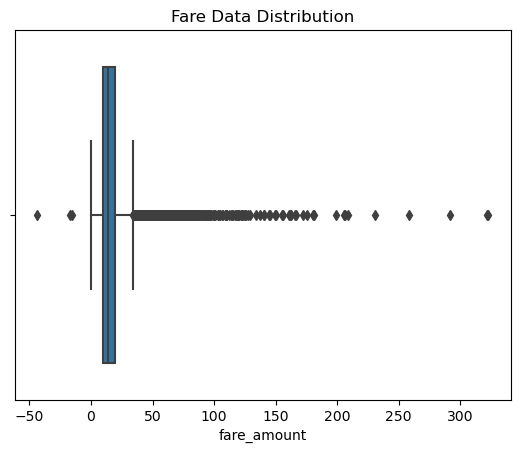

In [75]:
plt.title('Fare Data Distribution')
sns.boxplot(data=df, x='fare_amount');

There are some `fare_amount` data with negative value. Since it doesn't makes sense for payment to have negative value, the value will be changed to positive.

In [76]:
df[df['fare_amount'] < 0]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour,taxi_speed
64487,2023-01-05 10:51:00,2023-01-05 11:20:00,Standard Rate,116,151,1.0,2.22,-43.54,0.76,0.0,1.0,1.0,0.0,Manhattan,Hamilton Heights,Manhattan,Manhattan Valley,29.0,Thursday,10,4.593103
65108,2023-01-10 10:00:00,2023-01-10 10:26:00,Standard Rate,168,159,1.0,3.45,-17.38,0.26,0.0,1.0,1.0,0.0,Bronx,Mott Haven/Port Morris,Bronx,Melrose South,26.0,Tuesday,10,7.961538
67461,2023-01-26 10:10:00,2023-01-26 10:20:00,Standard Rate,248,126,1.0,1.51,-15.53,0.22,0.0,1.0,1.0,0.0,Bronx,West Farms/Bronx River,Bronx,Hunts Point,10.0,Thursday,10,9.060000


In [77]:
df.loc[df['fare_amount'] < 0, 'fare_amount'] = abs(df.loc[df['fare_amount'] < 0, 'fare_amount'])

According to NYC Taxi fare, initial charge for each trip is $3.00. This means, any `fare_amount` below 3 will be treated as an anomaly and will be dropped.

In [78]:
df[df['fare_amount'] < 3]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour,taxi_speed
20464,2023-01-11 14:29:03,2023-01-11 14:32:37,Standard Rate,120,243,1.0,1.70,2.50,0.0,0.00,3.0,1.0,0.00,Manhattan,Highbridge Park,Manhattan,Washington Heights North,3.566667,Wednesday,14,28.598131
24583,2023-01-13 10:33:18,2023-01-13 10:57:14,Negotiated Fare,7,127,4.0,8.31,0.05,0.0,6.55,2.0,2.0,0.00,Queens,Astoria,Manhattan,Inwood,23.933333,Friday,10,20.832869
28492,2023-01-15 00:27:02,2023-01-15 01:00:44,Negotiated Fare,256,256,1.0,5.80,0.01,0.0,0.00,2.0,1.0,0.00,Brooklyn,Williamsburg (South Side),Brooklyn,Williamsburg (South Side),33.700000,Sunday,0,10.326409
30233,2023-01-16 03:39:38,2023-01-16 03:54:12,Standard Rate,235,78,1.0,2.34,0.00,0.0,0.00,2.0,1.0,0.00,Bronx,University Heights/Morris Heights,Bronx,East Tremont,14.566667,Monday,3,9.638444
36901,2023-01-19 13:49:39,2023-01-19 14:40:05,Standard Rate,43,23,1.0,24.14,0.00,0.0,0.00,2.0,1.0,2.75,Manhattan,Central Park,Staten Island,Bloomfield/Emerson Hill,50.433333,Thursday,13,28.719101
40789,2023-01-21 02:46:13,2023-01-21 03:27:19,Negotiated Fare,112,265,1.0,28.80,0.00,0.0,6.55,2.0,2.0,0.00,Brooklyn,Greenpoint,Unknown,Outside of NYC,41.100000,Saturday,2,42.043796
43717,2023-01-22 16:49:59,2023-01-22 17:03:19,Negotiated Fare,196,82,1.0,1.34,0.15,0.0,0.00,2.0,2.0,0.00,Queens,Rego Park,Queens,Elmhurst,13.333333,Sunday,16,6.030000
44826,2023-01-23 10:38:28,2023-01-23 10:57:41,Negotiated Fare,129,223,2.0,3.30,0.00,0.0,0.00,2.0,2.0,0.00,Queens,Jackson Heights,Queens,Steinway,19.216667,Monday,10,10.303556
45261,2023-01-23 13:27:55,2023-01-23 14:35:24,Negotiated Fare,56,260,1.0,18.20,0.00,0.0,0.00,2.0,2.0,0.00,Queens,Corona,Queens,Woodside,67.483333,Monday,13,16.181773
47269,2023-01-24 11:01:43,2023-01-24 11:14:46,Negotiated Fare,42,69,1.0,2.20,0.00,0.0,0.00,2.0,2.0,0.00,Manhattan,Central Harlem North,Bronx,East Concourse/Concourse Village,13.050000,Tuesday,11,10.114943


In [79]:
df.drop(index=df[df['fare_amount'] < 3].index, inplace=True)

#### `tip_amount`

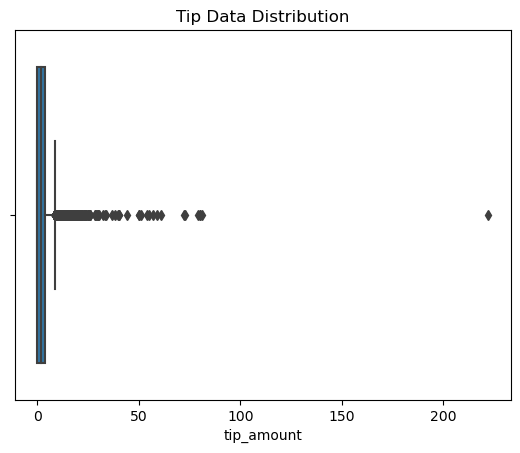

In [80]:
plt.title('Tip Data Distribution')
sns.boxplot(data=df, x='tip_amount');

According to the boxplot for `tip_amount` there are extreme outliers in the dataset. In order to remove outliers, any tips that is higher than `fare_amount` will be treated as data anomaly and will be dropped.

In [81]:
df[df['tip_amount'] > df['fare_amount']]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour,taxi_speed
297,2023-01-01 06:36:05,2023-01-01 06:58:19,Standard Rate,196,186,2.0,7.63,33.80,54.00,6.55,1.0,1.0,2.75,Queens,Rego Park,Manhattan,Penn Station/Madison Sq West,22.233333,Sunday,6,20.590705
320,2023-01-01 07:52:09,2023-01-01 07:56:18,Standard Rate,41,166,1.0,0.69,6.50,7.00,0.00,1.0,1.0,0.00,Manhattan,Central Harlem,Manhattan,Morningside Heights,4.150000,Sunday,7,9.975904
1082,2023-01-01 19:06:41,2023-01-01 19:23:17,Standard Rate,179,129,1.0,2.81,12.50,14.64,0.00,1.0,1.0,0.00,Queens,Old Astoria,Queens,Jackson Heights,16.600000,Sunday,19,10.156627
1410,2023-01-02 08:50:56,2023-01-02 08:54:26,Standard Rate,93,138,1.0,2.18,10.00,14.00,0.00,1.0,1.0,0.00,Queens,Flushing Meadows-Corona Park,Queens,LaGuardia Airport,3.500000,Monday,8,37.371429
2458,2023-01-02 18:48:57,2023-01-02 18:52:46,Standard Rate,7,7,1.0,0.64,5.80,10.00,0.00,1.0,1.0,0.00,Queens,Astoria,Queens,Astoria,3.816667,Monday,18,10.061135
4686,2023-01-03 22:09:01,2023-01-03 22:19:21,Standard Rate,166,42,1.0,1.85,12.10,20.00,0.00,1.0,1.0,0.00,Manhattan,Morningside Heights,Manhattan,Central Harlem North,10.333333,Tuesday,22,10.741935
5742,2023-01-04 14:21:06,2023-01-04 14:26:27,Standard Rate,225,225,1.0,0.80,6.50,10.00,0.00,1.0,1.0,0.00,Brooklyn,Stuyvesant Heights,Brooklyn,Stuyvesant Heights,5.350000,Wednesday,14,8.971963
6896,2023-01-04 21:42:25,2023-01-04 21:49:17,Standard Rate,74,75,1.0,1.41,9.30,10.00,0.00,1.0,1.0,0.00,Manhattan,East Harlem North,Manhattan,East Harlem South,6.866667,Wednesday,21,12.320388
11575,2023-01-06 23:37:35,2023-01-06 23:47:32,Standard Rate,83,129,1.0,3.18,16.30,19.49,0.00,1.0,1.0,0.00,Queens,Elmhurst/Maspeth,Queens,Jackson Heights,9.950000,Friday,23,19.175879
11781,2023-01-07 04:22:05,2023-01-07 04:26:48,Standard Rate,74,42,1.0,1.10,7.90,12.50,0.00,1.0,1.0,0.00,Manhattan,East Harlem North,Manhattan,Central Harlem North,4.716667,Saturday,4,13.992933


In [82]:
df.drop(index=df[df['tip_amount'] > df['fare_amount']].index, inplace=True)

#### `tolls_amount`

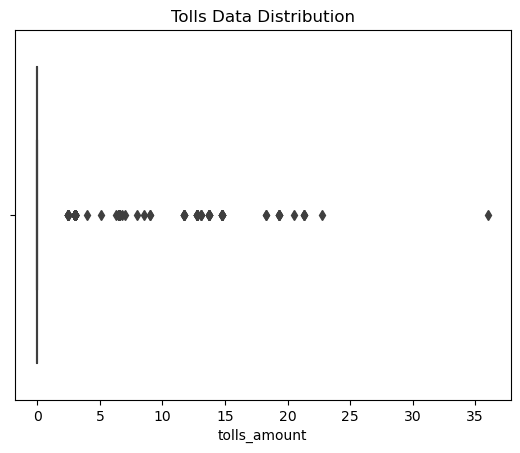

In [83]:
plt.title('Tolls Data Distribution')
sns.boxplot(data=df, x='tolls_amount');

While boxplot for `tolls_amount` is showing an extreme outliers, the value is still within reason and therefore will not be dropped.

#### `payment_type`

- 1 = Credit card
- 2 = Cash
- 3 = No charge
- 4 = Dispute
- 5 = Unknown
- 6 = Voided trip

In [84]:
df['payment_type'].value_counts()

payment_type
1.0    40219
2.0    19973
5.0      430
3.0       98
4.0       19
Name: count, dtype: int64

Outliers & Anomaly in `payment_type` has been cleaned in previous section. Here, `payment_type` will be formatted into category and changed into their corresponding string data.

In [85]:
def payment_str(x):
    if x == 1:
        return 'Credit card'
    elif x == 2:
        return 'Cash'
    elif x == 3:
        return 'No charge'
    elif x == 4:
        return 'Dispute'
    else:
        return 'Unknown'

In [86]:
df['payment_type'] = df['payment_type'].apply(payment_str).astype('category')

In [87]:
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour,taxi_speed
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard Rate,166,143,1.0,2.58,14.9,4.03,0.0,Credit card,1.0,2.75,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,11.016667,Sunday,0,14.051437
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard Rate,24,43,1.0,1.81,10.7,2.64,0.0,Credit card,1.0,0.00,Manhattan,Bloomingdale,Manhattan,Central Park,6.766667,Sunday,0,16.049261
3,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard Rate,41,238,1.0,1.30,6.5,1.70,0.0,Credit card,1.0,0.00,Manhattan,Central Harlem,Manhattan,Upper West Side North,5.816667,Sunday,0,13.409742
4,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard Rate,41,74,1.0,1.10,6.0,0.00,0.0,Credit card,1.0,0.00,Manhattan,Central Harlem,Manhattan,East Harlem North,5.966667,Sunday,0,11.061453
5,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard Rate,41,262,1.0,2.78,17.7,0.00,0.0,Cash,1.0,2.75,Manhattan,Central Harlem,Manhattan,Yorkville East,17.550000,Sunday,0,9.504274


#### `trip_type`

- 1 = Street-hail
- 2 = Dispatch

`trip_type` will be formatted into category and changed into their corresponding string data.

In [88]:
df['trip_type'].value_counts()

trip_type
1.0    60182
2.0      557
Name: count, dtype: int64

In [89]:
df['trip_type'] = df['trip_type'].apply(lambda x: 'Street-hail' if x == 1 else 'Dispatch').astype('category')

In [90]:
df['trip_type']

0        Street-hail
1        Street-hail
3        Street-hail
4        Street-hail
5        Street-hail
            ...     
68205    Street-hail
68207    Street-hail
68208    Street-hail
68209    Street-hail
68210    Street-hail
Name: trip_type, Length: 60739, dtype: category
Categories (2, object): ['Dispatch', 'Street-hail']

#### `congestion_surcharge`

In [91]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
0.00    44246
2.75    16477
2.50       16
Name: count, dtype: int64

According to NYC TLC Fare, `congestion_surcharge` will be added if the trip begin, pass, or end through Manhattan south of 96th Street. A fare value of 2.75 indicates Green Taxis and Vehicle for Hire (VFH) while a fare value of 2.50 indicates Yellow taxis. This means 16477 number of trips happening in January 2023 comes from Green Taxis and VFH.

In [92]:
df[df['congestion_surcharge'] > 0][['PUBorough','DOBorough']].value_counts()

PUBorough  DOBorough
Manhattan  Manhattan    14355
Brooklyn   Manhattan     1218
Queens     Manhattan      645
Manhattan  Brooklyn       161
           Queens          60
Bronx      Manhattan       26
Queens     Queens           8
Brooklyn   Bronx            4
Manhattan  Unknown          3
Brooklyn   Brooklyn         3
           Unknown          2
Queens     Brooklyn         2
Manhattan  Bronx            1
Brooklyn   Queens           1
           EWR              1
Queens     Bronx            1
           EWR              1
Unknown    Unknown          1
Name: count, dtype: int64

Most of the data shows that the pickup location or the dropoff location are from Manhattan. This means the data is already in accordance to the explanation.

Since we will be using `fare_amount` as price, we will be changing `congestion_surcharge` data into category as a consideration if there is any congestion during trip.
- `congestion_surcharge` == 0 --> No Congestion
- `congestion_surcharge` > 0 --> Congestion

In [93]:
df['congestion_surcharge'] = df['congestion_surcharge'].apply(lambda x: 'Congestion' if x > 0 else 'No Congestion').astype('category')
df.rename(columns=({'congestion_surcharge' : 'congestion'}),inplace=True)

#### `PUBorough`, `PUZone`, `DOBorough`, `DOZone`

There are cases where `PUBorough` and `DOBorough` have Unknown value within the dataset. After exploring the data, it can be concluded that these trips are for trips from or to outside NYC.
Following this, `PUZone` and `DOZone` that have Unknown value will be changed to Outside of NYC to homogenize the data.

In [94]:
df.loc[df['PUBorough'] == 'Unknown', 'PUBorough'] = 'Outside of NYC'
df.loc[df['DOBorough'] == 'Unknown', 'DOBorough'] = 'Outside of NYC'
df.loc[df['PUZone'] == 'Unknown', 'PUZone'] = 'Outside of NYC'
df.loc[df['DOZone'] == 'Unknown', 'DOZone'] = 'Outside of NYC'

This dataset is about NYC taxi trip, therefore trips between Outside of NYC will be dropped to focus the dataset.

In [95]:
df[(df['PUBorough'] == 'Outside of NYC') & (df['DOBorough'] == 'Outside of NYC')]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion,PUBorough,PUZone,DOBorough,DOZone,trip_duration,trip_day,trip_hour,taxi_speed
3726,2023-01-03 14:35:04,2023-01-03 14:45:18,Standard Rate,264,264,1.0,3.70,16.3,0.00,0.0,Cash,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,10.233333,Tuesday,14,21.693811
7748,2023-01-05 12:12:50,2023-01-05 12:20:46,Standard Rate,264,264,1.0,1.80,10.7,0.00,0.0,Cash,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,7.933333,Thursday,12,13.613445
11726,2023-01-07 02:17:41,2023-01-07 02:35:08,Nassau or Westchester,265,265,1.0,5.40,45.0,0.00,0.0,Cash,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,17.450000,Saturday,2,18.567335
23666,2023-01-12 18:00:16,2023-01-12 18:19:16,Standard Rate,264,264,2.0,2.86,18.4,6.42,0.0,Credit card,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,19.000000,Thursday,18,9.031579
27713,2023-01-14 16:28:23,2023-01-14 16:35:40,Standard Rate,264,264,1.0,0.94,6.5,0.00,0.0,Cash,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,7.283333,Saturday,16,7.743707
29441,2023-01-15 15:23:29,2023-01-15 15:42:15,Nassau or Westchester,265,265,1.0,16.70,69.5,0.00,0.0,Cash,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,18.766667,Sunday,15,53.392540
31661,2023-01-17 01:08:55,2023-01-17 01:55:03,Standard Rate,264,264,1.0,19.70,80.7,0.00,0.0,Cash,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,46.133333,Tuesday,1,25.621387
33809,2023-01-18 03:49:39,2023-01-18 03:59:40,Standard Rate,264,264,1.0,3.60,12.0,4.20,0.0,Credit card,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,10.016667,Wednesday,3,21.564060
37196,2023-01-19 15:32:00,2023-01-19 15:37:34,Standard Rate,264,264,1.0,0.80,6.5,3.00,0.0,Credit card,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,5.566667,Thursday,15,8.622754
38438,2023-01-20 02:30:37,2023-01-20 02:37:58,Standard Rate,264,264,1.0,1.31,9.3,2.36,0.0,Credit card,Street-hail,No Congestion,Outside of NYC,Outside of NYC,Outside of NYC,Outside of NYC,7.350000,Friday,2,10.693878


In [96]:
df.drop(index=df[(df['PUBorough'] == 'Unknown') & (df['DOBorough'] == 'Unknown')].index, inplace=True)

Using these columns, we are able to create new feature to help with the analysis :
- `trip_category` = Categorize whether the trip begins and ends in the same Borough or different Borough<br>
- 1 = Inborough Trip
- 2 = Outborough Trip

In [97]:
df['trip_category'] = (df['PUBorough'] == df['DOBorough']).apply(lambda x: 'Inborough Trip' if x == True else 'OutBorough Trip').astype('category')

In [98]:
df['trip_category'].value_counts()

trip_category
Inborough Trip     54228
OutBorough Trip     6511
Name: count, dtype: int64

### **Clean Data**

In this section, DataFrame will be rearranged for easier viewing and the clean data will be saved for further use.

In [99]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'tolls_amount', 'payment_type',
       'trip_type', 'congestion', 'PUBorough', 'PUZone', 'DOBorough', 'DOZone',
       'trip_duration', 'trip_day', 'trip_hour', 'taxi_speed',
       'trip_category'],
      dtype='object')

In [100]:
df = df[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance','trip_duration', 'trip_day', 'trip_hour',
       'trip_category', 'taxi_speed', 'fare_amount', 'tip_amount', 'tolls_amount', 'payment_type',
       'trip_type', 'congestion', 'PUBorough', 'PUZone', 'DOBorough',
       'DOZone']].reset_index().drop(columns='index')
df.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,trip_duration,trip_day,trip_hour,trip_category,taxi_speed,fare_amount,tip_amount,tolls_amount,payment_type,trip_type,congestion,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Standard Rate,166,143,1.0,2.58,11.016667,Sunday,0,Inborough Trip,14.051437,14.9,4.03,0.0,Credit card,Street-hail,Congestion,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Standard Rate,24,43,1.0,1.81,6.766667,Sunday,0,Inborough Trip,16.049261,10.7,2.64,0.0,Credit card,Street-hail,No Congestion,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Standard Rate,41,238,1.0,1.30,5.816667,Sunday,0,Inborough Trip,13.409742,6.5,1.70,0.0,Credit card,Street-hail,No Congestion,Manhattan,Central Harlem,Manhattan,Upper West Side North
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Standard Rate,41,74,1.0,1.10,5.966667,Sunday,0,Inborough Trip,11.061453,6.0,0.00,0.0,Credit card,Street-hail,No Congestion,Manhattan,Central Harlem,Manhattan,East Harlem North
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Standard Rate,41,262,1.0,2.78,17.550000,Sunday,0,Inborough Trip,9.504274,17.7,0.00,0.0,Cash,Street-hail,Congestion,Manhattan,Central Harlem,Manhattan,Yorkville East


**Save Clean Data to CSV**

In [101]:
# df.to_csv('NYC TLC Trip Clean.csv', index=False)

## **Exploratory Data Analysis**

In [102]:
df.describe()

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,trip_duration,trip_hour,taxi_speed,fare_amount,tip_amount,tolls_amount
count,60739,60739,60739.000000,60739.000000,60739.000000,60739.000000,60739.000000,60739.000000,60739.000000,60739.000000,60739.000000,60739.000000
mean,2023-01-16 22:24:33.043991552,2023-01-16 22:38:54.517146880,97.450073,140.182848,1.308863,2.941414,14.357886,13.881098,12.065391,16.939288,2.255706,0.164677
min,2023-01-01 00:01:31,2023-01-01 00:13:26,3.000000,1.000000,1.000000,0.620000,2.000000,0.000000,0.249072,3.000000,0.000000,0.000000
25%,2023-01-09 12:11:30.500000,2023-01-09 12:29:51.500000,74.000000,74.000000,1.000000,1.330000,8.000000,10.000000,8.705715,10.000000,0.000000,0.000000
50%,2023-01-17 09:05:02,2023-01-17 09:20:39,75.000000,140.000000,1.000000,2.040000,11.916667,15.000000,10.755853,13.500000,2.000000,0.000000
75%,2023-01-24 16:04:09,2023-01-24 16:17:41,116.000000,223.000000,1.000000,3.460000,17.700000,18.000000,13.850748,19.800000,3.500000,0.000000
max,2023-01-31 23:58:23,2023-02-01 00:31:14,265.000000,265.000000,6.000000,57.090000,296.300000,23.000000,54.417817,322.900000,44.070000,36.050000
std,NaN,NaN,59.801693,76.333655,0.960202,2.768111,10.228414,5.203883,5.314163,11.728401,2.695049,1.076771


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60739 entries, 0 to 60738
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   60739 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  60739 non-null  datetime64[ns]
 2   RatecodeID             60739 non-null  category      
 3   PULocationID           60739 non-null  int64         
 4   DOLocationID           60739 non-null  int64         
 5   passenger_count        60739 non-null  float64       
 6   trip_distance          60739 non-null  float64       
 7   trip_duration          60739 non-null  float64       
 8   trip_day               60739 non-null  category      
 9   trip_hour              60739 non-null  int32         
 10  trip_category          60739 non-null  category      
 11  taxi_speed             60739 non-null  float64       
 12  fare_amount            60739 non-null  float64       
 13  t

### **Numerical Features**

In [104]:
# List of numerical feature from DataFrame
num_feature = ['passenger_count', 'trip_distance', 'trip_duration', 'trip_hour', 'taxi_speed', 'fare_amount', 'tip_amount', 'tolls_amount']

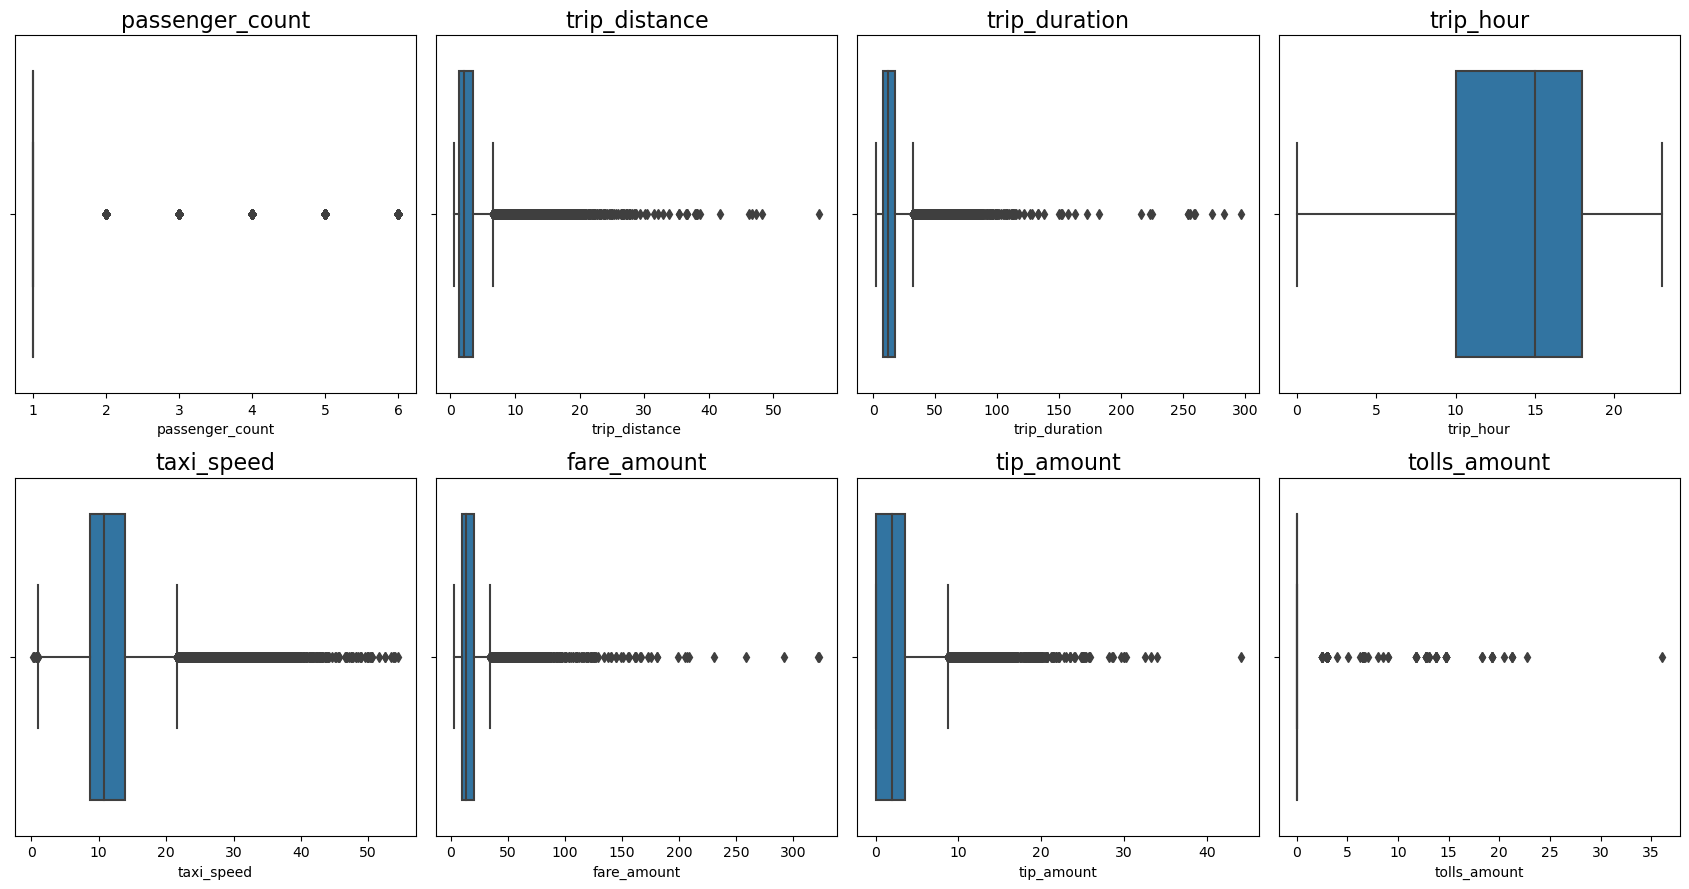

In [105]:
plt.figure(figsize=(17,9))
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(2,4, plotnumber)
    sns.boxplot(x=feature, data=df)
    plt.title(feature, fontsize= 16)
    plt.tight_layout()
    plotnumber += 1

plt.show();

Based on boxplot graph on numerical feature, there are many outliers within the data even after removing extreme outliers from earlier section. Removing more outliers from the data is not recommended because it may risk a large lost of data.

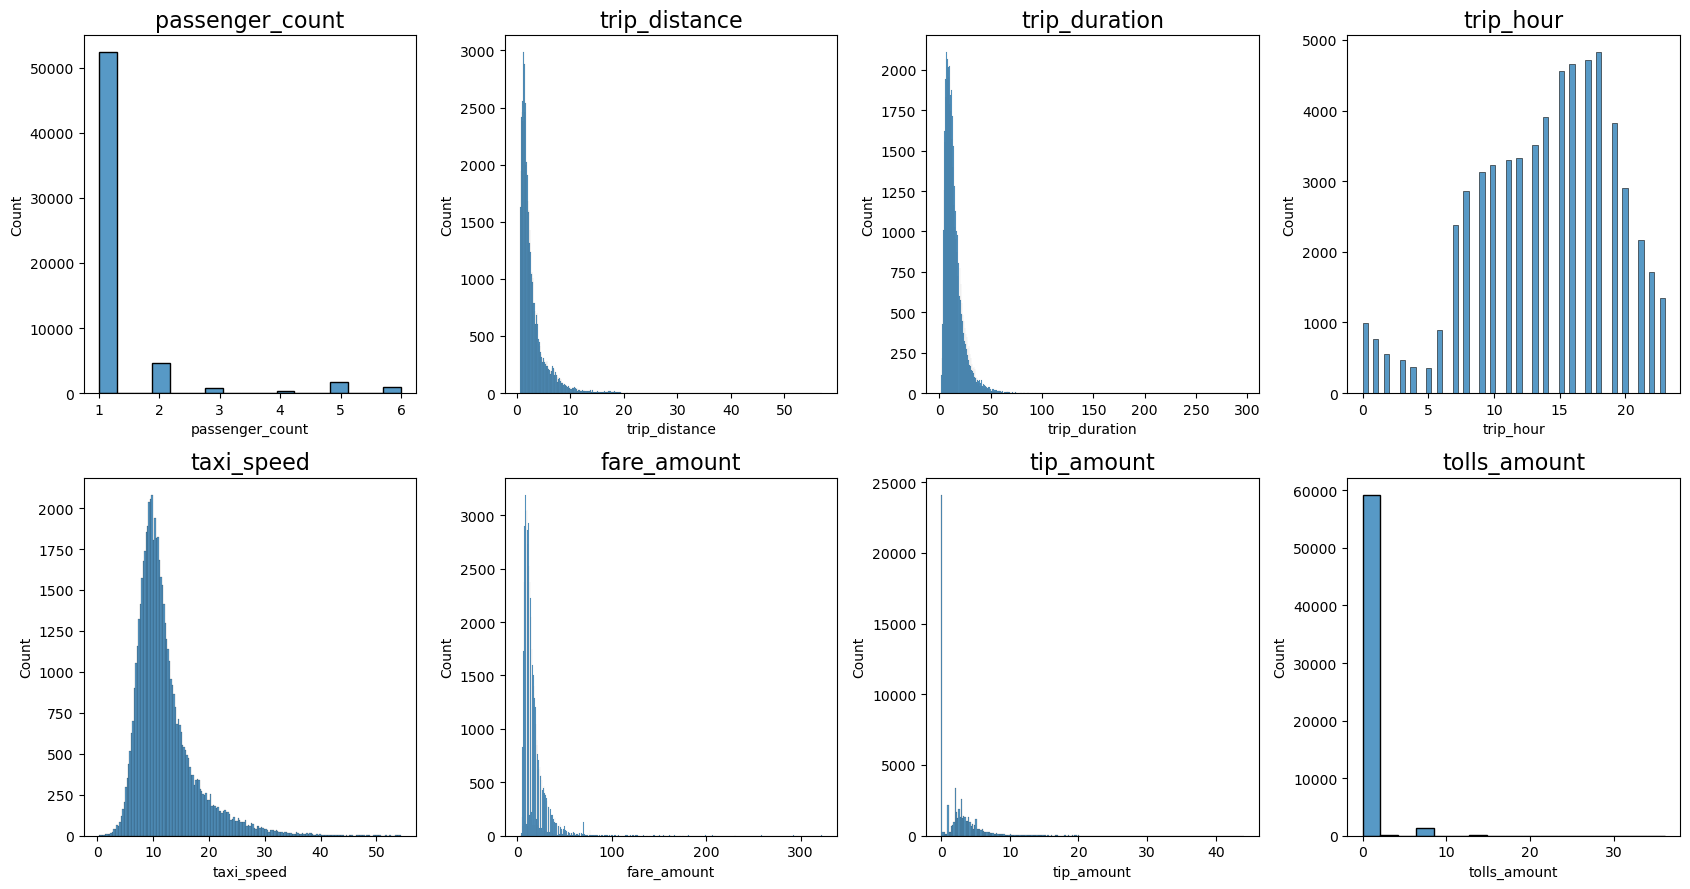

In [106]:
plt.figure(figsize=(17,9))
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(2,4, plotnumber)
    sns.histplot(x=feature, data=df)
    plt.title(feature, fontsize= 16)
    plt.tight_layout()
    plotnumber += 1

plt.show();

According to histogram for numerical features, most of the data is right-skewed. Which explains that the data is not normally distributed.

#### **Correlation Between Each Numerical Features**

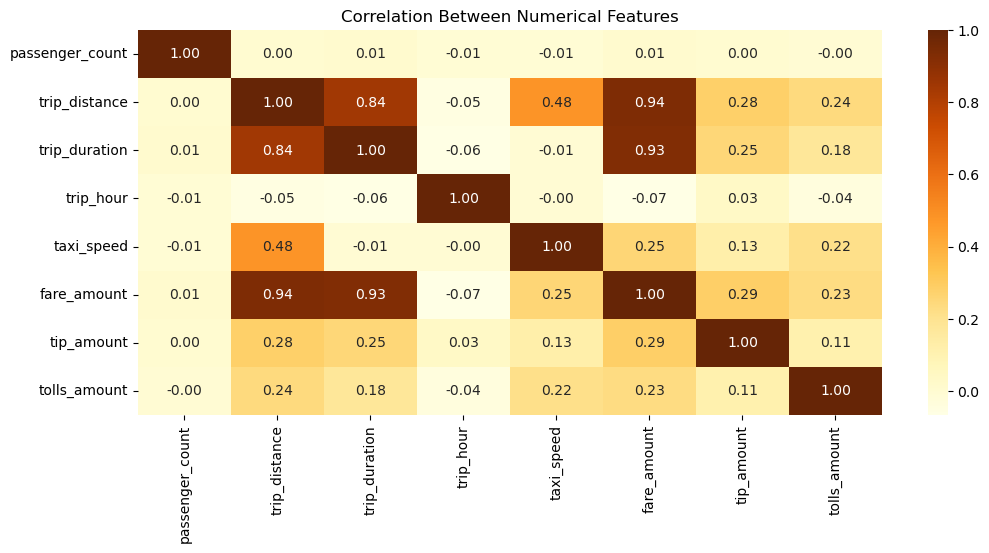

In [107]:
plt.figure(figsize =(12,5))
plt.title('Correlation Between Numerical Features')
sns.heatmap(data=df.corr('spearman', numeric_only=True).drop(columns=['PULocationID','DOLocationID'],index=['PULocationID','DOLocationID']), 
            cmap='YlOrBr', 
            annot=True, 
            fmt='.2f');

According to the heatmap above, some conclusion can be made:
- `fare_amount` have very strong correlation with `trip distance` and `trip_duration`.
- `trip_distance` have very strong correlation with `trip_duration`.

## **Customer Preference Analysis**

In this section, we will analyze what is passenger preference when they decided to took trips using NYC TLC taxi services.

### **Time-Based Preference**

#### **January Trips Trend**
In this section, number of trips taken for each day will be plotted on a lineplot to see if there is any trend or pattern in the data.

In [108]:
trip_date = df.groupby(by=df['lpep_pickup_datetime'].dt.date)[['trip_day']].count().reset_index()

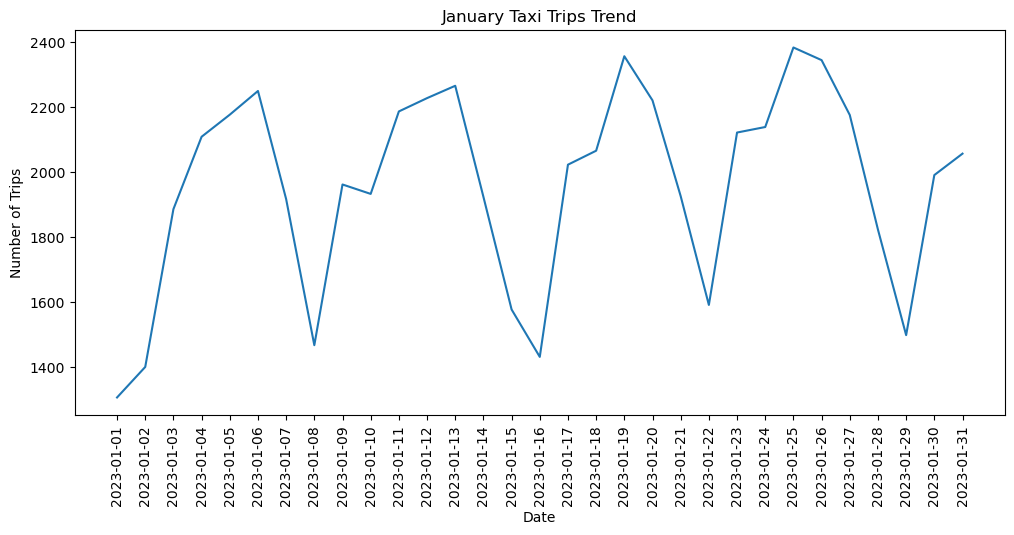

In [109]:
plt.figure(figsize =(12,5))
plt.title('January Taxi Trips Trend')
ax = sns.lineplot(data=trip_date,
              x='lpep_pickup_datetime', y='trip_day')

plt.xlabel('Date')
plt.xticks(ticks=trip_date['lpep_pickup_datetime'].unique(), rotation=90)
plt.ylabel('Number of Trips')
plt.show()

Based on the graph above, there are some insights that can be taken :
- There is a repeating pattern in total number of trips taken across January 2023, starting with an increase of number of trips across some days before it decreased again.
- Upon exploring the data, the decrease of data mostly occurs during weekend.

#### **Passenger Preferred Day of Trip**

In this section, we will check if there is any trend or pattern based on the day passenger decided to took trips using taxi. We will also check if there is any significant difference between number of trips taken.

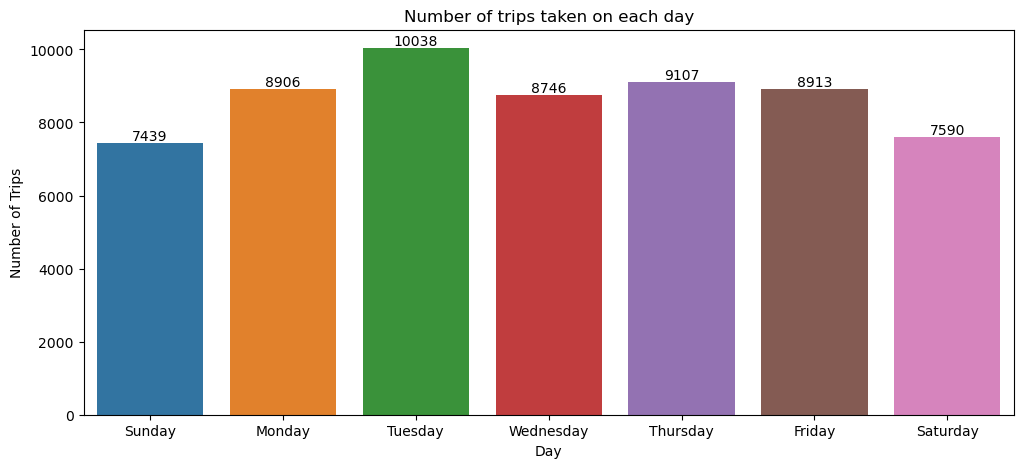

In [110]:
plt.figure(figsize =(12,5))
plt.title('Number of trips taken on each day')
ax = sns.countplot(data=df,
              x='trip_day')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.show()

Based on the graph above, we can have some insights regarding our passenger :
- Our passenger prefers taking taxi during weekdays rather than during weekend. This preference may comes from the fact that they need to go to work during weekdays.
- Tuesday have the highest number of trips taken than other day of the week.

**Passenger Preferred Day of Trip by Borough**

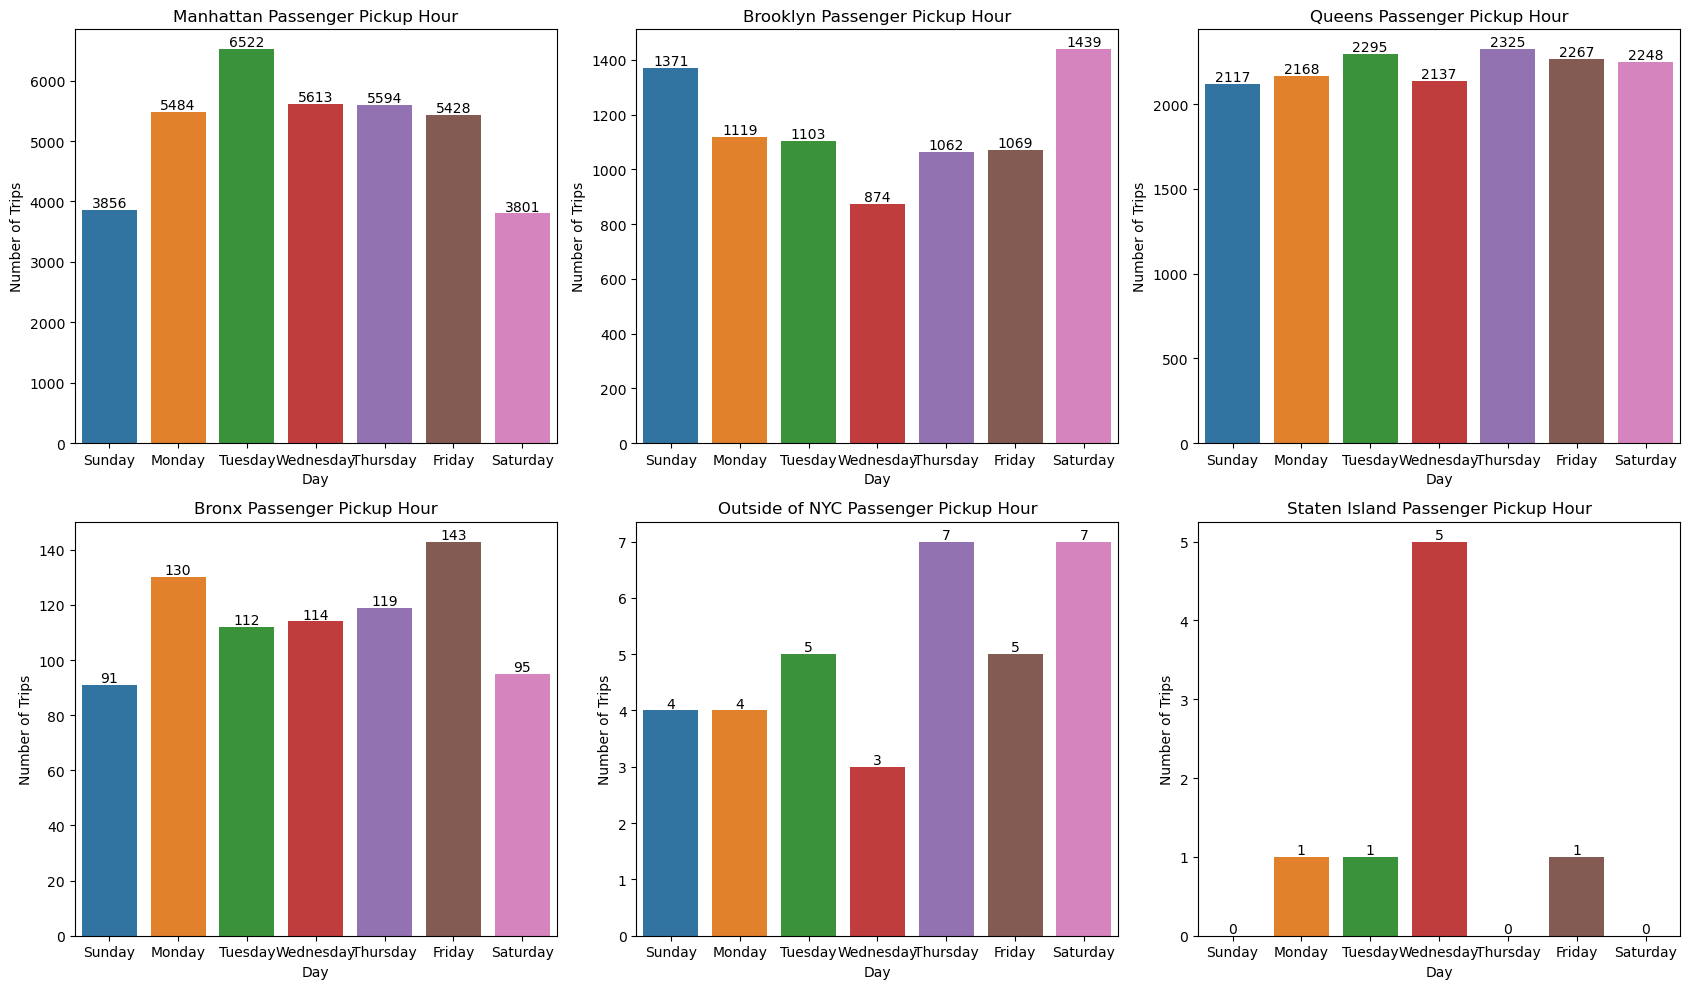

In [111]:
plt.figure(figsize =(17,10))
plotnumber = 1
for i in df['PUBorough'].unique():
    plt.subplot(2,3,plotnumber)
    plt.title(f'{i} Passenger Pickup Hour')
    ax = sns.countplot(data=df[df['PUBorough'] == i],
                x='trip_day')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


    plt.xlabel('Day')
    plt.ylabel('Number of Trips')
    plt.tight_layout()
    plotnumber += 1
plt.show()

Based on the graph above, we can have some insights regarding our passenger :
- Manhattan Borough and Bronx Borough has the same trend as overall Day of Trips, where weekdays number of trips are higher than weekend.
- However, Brooklyn Borough has different trend than overall trend, where weekends number of trips are higher than weekend.
- Queens Borough has different trend than overall trend, where the number of trips across day generally the same.
- Outside of NYC and Staten Island Borough cannot be concluded because the amount of data is too small.

#### **Passenger Pickup Hour Distribution**

In this section, we will check if there is any trend or pattern based on trip pickup hour. By analyzing this pattern, we will able to know when is our peak time where people will take trips using taxi and when is our low time where people are not taking trips using taxi.

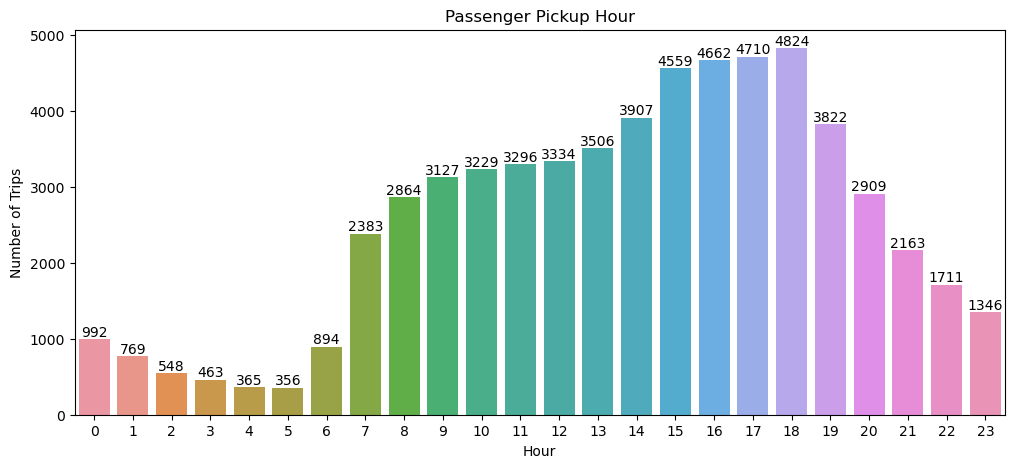

In [112]:
plt.figure(figsize =(12,5))
plt.title('Passenger Pickup Hour')
ax = sns.countplot(data=df,
              x='trip_hour')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

Based on graph above, we can have some insight regarding our passenger :
- Our peak time to pickup passenger starts from 15:00 until 18:59. This peak timeframe may comes from the fact that most people in NYC ends their work during that time and took taxi to head home.
- There is also a significant decrease of number of trip especially after past midnight to early morning (00:00 - 05:59). This is an expected situation because during this time, most people are already at home therefore not needing any trip. Adding the fact that according to NYC TLC Taxi fare, there is an additional $1.00 overnight surcharge from 20:00 until 06:00, people might rather not take taxi during that time period.

**Passenger Pickup Hour Distribution by Borough**

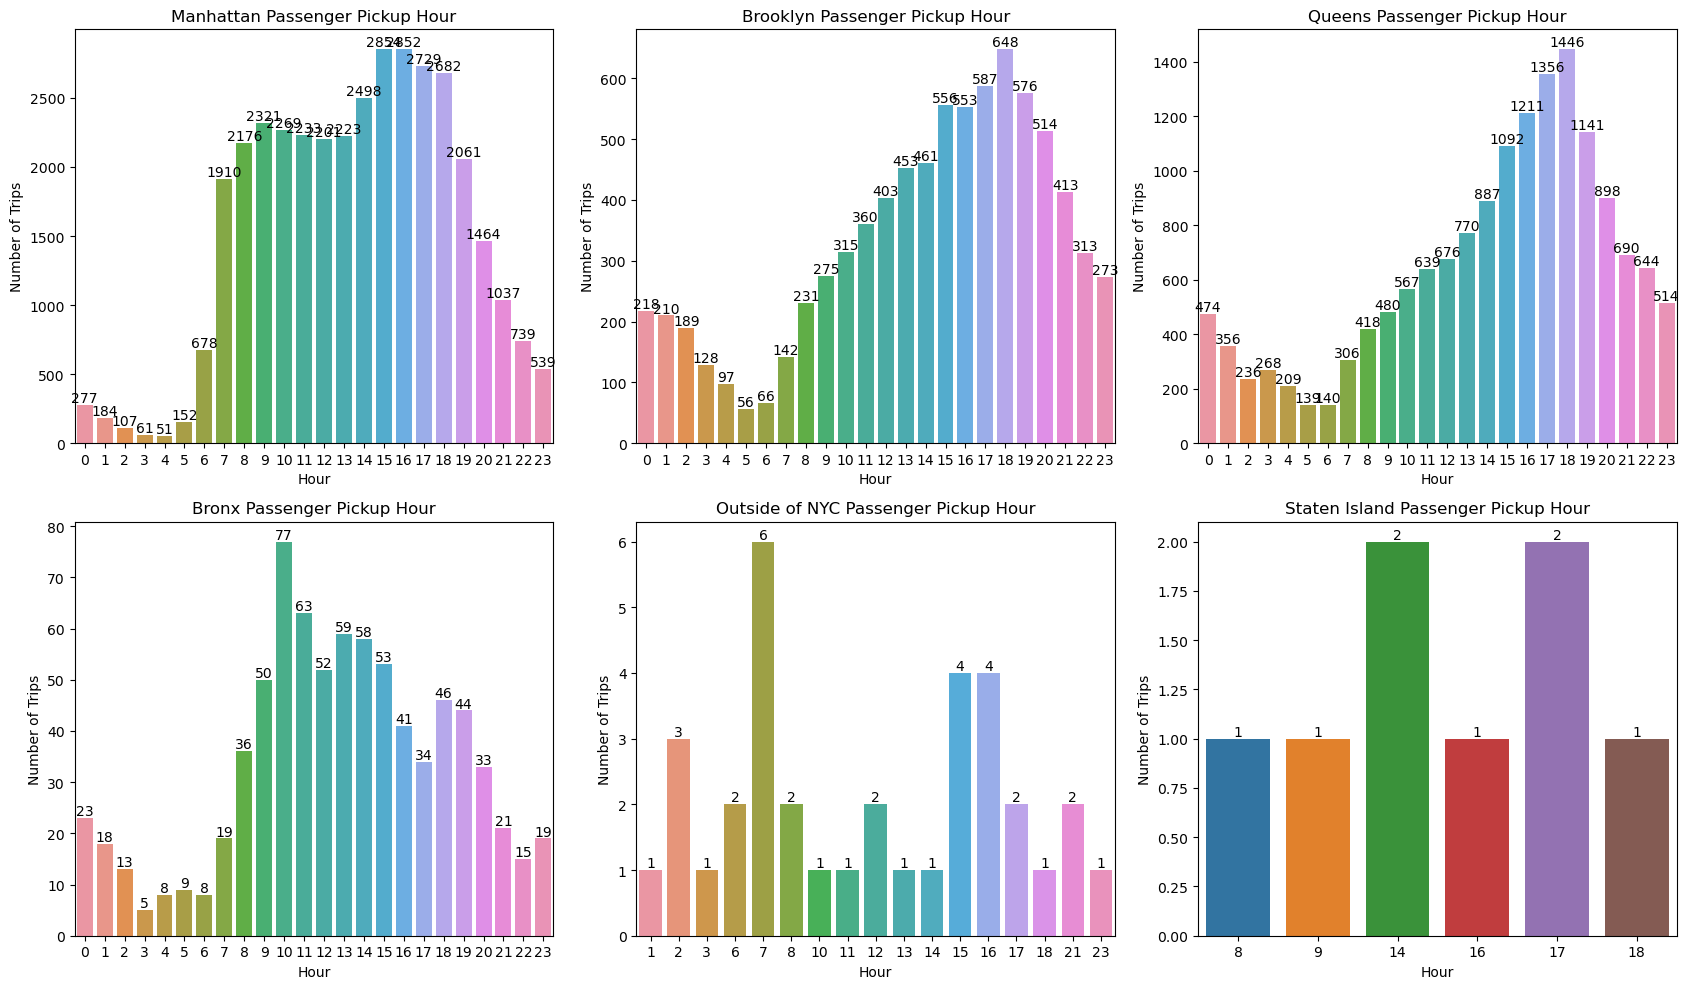

In [113]:
plt.figure(figsize =(17,10))
plotnumber = 1
for i in df['PUBorough'].unique():
    plt.subplot(2,3,plotnumber)
    plt.title(f'{i} Passenger Pickup Hour')
    ax = sns.countplot(data=df[df['PUBorough'] == i],
                x='trip_hour')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


    plt.xlabel('Hour')
    plt.ylabel('Number of Trips')
    plt.tight_layout()
    plotnumber += 1
plt.show()

Based on graph above, we can have some insight regarding our passenger :
- Peak Hour and Low Hour in popular Borough (Manhattan, Brooklyn, and Queens) have the same trend with Overall Peak Hour at 15:00-18:59 and Low Hour at 00:00-05:59.
- On Bronx Borough, while Low Hour remains the same (00:00-05:59), Peak Hour is slightly different than popular Borough where the number of trips peaks at 10:00-14:59.
- Data for Outside of NYC and Staten Island is too small to make any conclusion.

#### **Median Fare Each Hour**
This section shows median fare for each hour to see the distribution of fare during each hour.

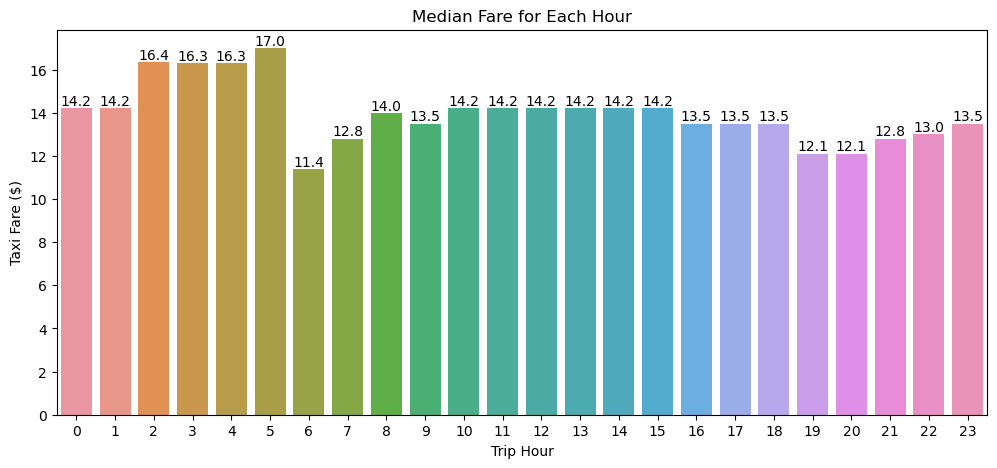

In [114]:
plt.figure(figsize =(12,5))
plt.title('Median Fare for Each Hour')
ax = sns.barplot(data=df, x='trip_hour', y='fare_amount', estimator='median', errorbar=('ci', 0))
plt.xlabel('Trip Hour')
plt.ylabel('Taxi Fare ($)')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

According to graph above, some insight can be taken :
- Based earlier analysis, there are two important time frame for the taxi trip which is Peak Hour (15:00 - 18:59) and Low Hour (00:00 - 05:59) that will be our main focus.
- During Peak Hour, median taxi fare for each trip remain stable at $13.5 - $14.2. What can be inferred from the data is, there is no additional fare for trip that starts during Peak Hour.
- During Low Hour, median taxi fare for each trip steadily increase at range $14.2 - $17.0. This increasing trend is expected because there is also an additional overnight surcharge payment. At the same time, it shows that people are willing to pay more for taxi during that time, mainly because other forms of transportation are already closed.

**Median Fare Each Hour by Borough**

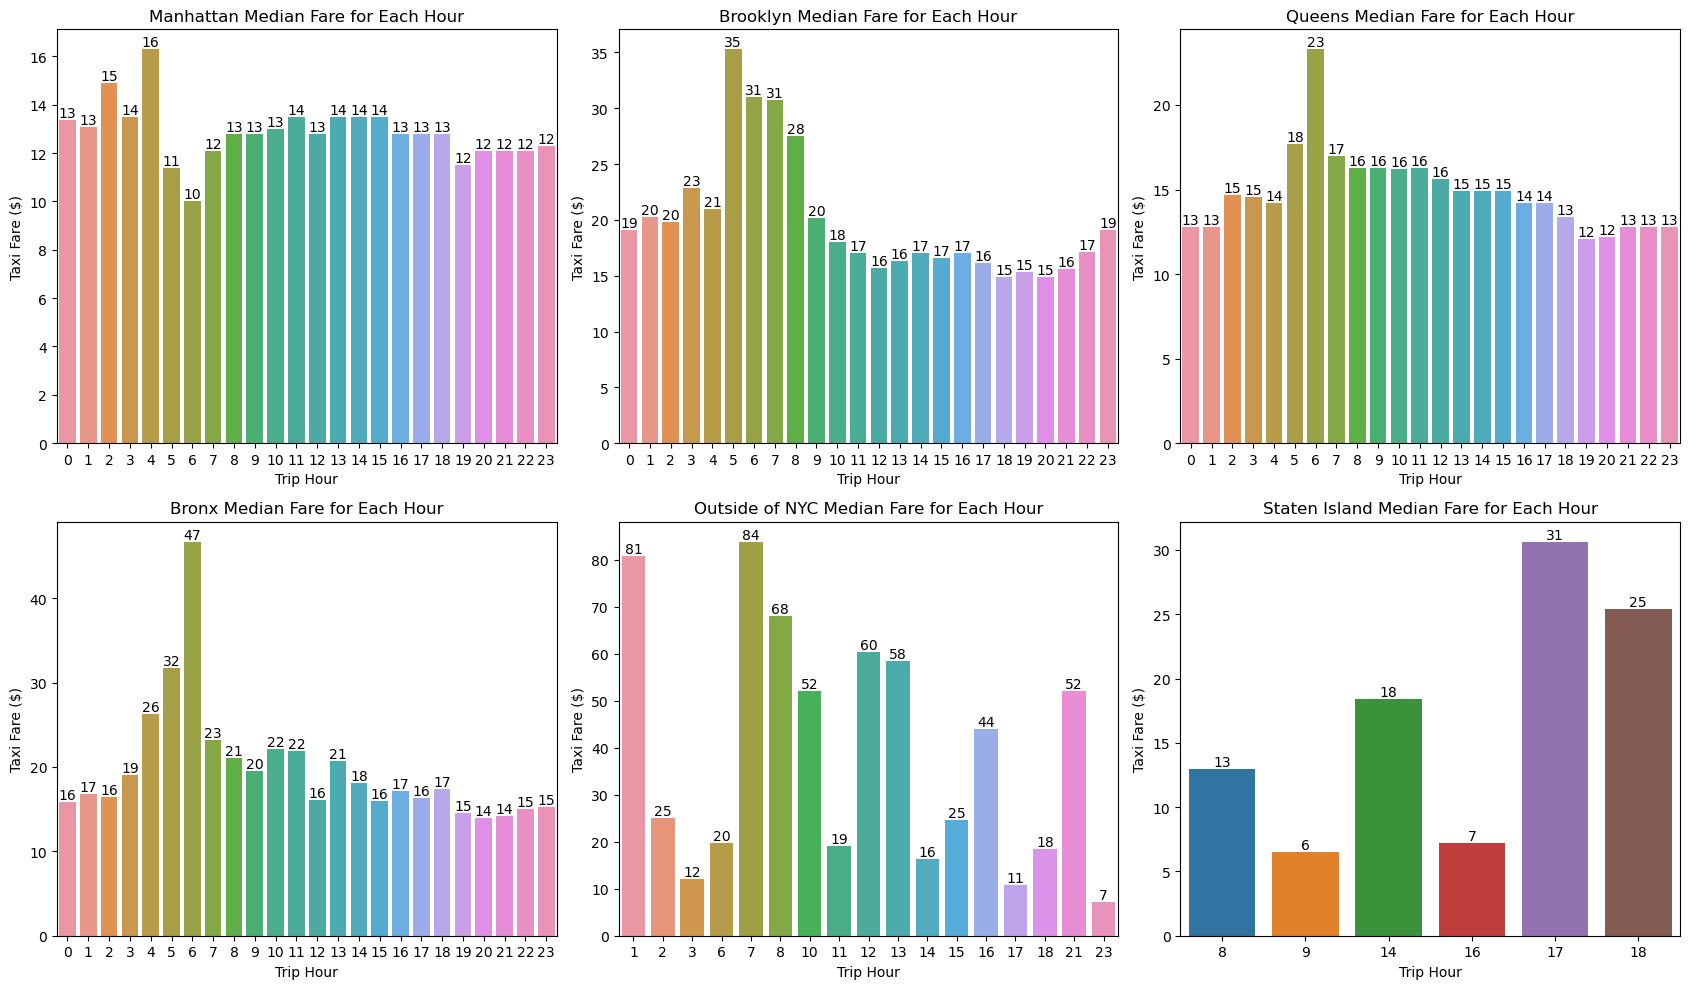

In [115]:
plt.figure(figsize =(17,10))
plotnumber = 1
for i in df['PUBorough'].unique():
    plt.subplot(2,3,plotnumber)
    plt.title(f'{i} Median Fare for Each Hour')
    ax = sns.barplot(data=df[df['PUBorough'] == i], x='trip_hour', y='fare_amount', estimator='median', errorbar=('ci', 0))
    plt.xlabel('Trip Hour')
    plt.ylabel('Taxi Fare ($)')

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    plt.tight_layout()
    plotnumber += 1
plt.show()

According to the graph above, some insight can be taken :
- Median Fare for Each Hour in Brooklyn borough and Bronx borough is higher than other borough, especially during low time.
- Median Fare for Outside of NYC trip is higher because most of the trip will be a medium to long distance trip that have higher fare than most trips in other Borough that mostly populates with short distance trip.
- Data for Staten Island is too small to make any conclusion

### **Location Based Preference**

#### **Passenger Preferred Trip Category**
In this section, we will check if customer prefers trip within their borough or trip outside their pickup borough. Knowing this preference will help us to know how to dispatch taxi within each borough.

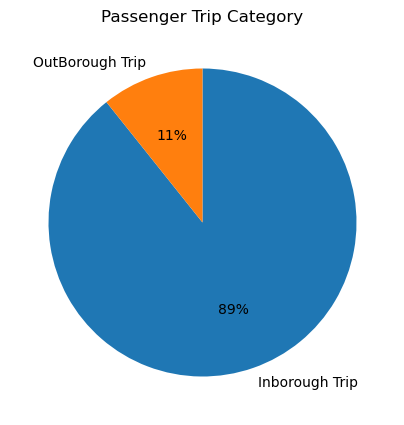

In [116]:
plt.figure(figsize =(12,5))
plt.title('Passenger Trip Category')

plt.pie(data=df,
        x=df['trip_category'].value_counts().values,
        labels=df['trip_category'].value_counts().index,
        autopct='%.0f%%',
        counterclock=False,
        startangle=90)

plt.show()

Based on graph above, we can have some insight regarding our passenger :
- 89% of total passenger prefers taking trip within borough which means they generally prefer trip with relative short distance.
- Since most of passengers prefer to take trip within borough, we can dispatch more taxis on popular borough and less taxis on less popular borough because the taxis tends to stay within the same borough.

#### **Passenger Preferred Pick-Up Borough and Drop-Off Borough**

In this section, we will check which borough are popular to our passenger to find out their preferred pick-up location and drop-off location.

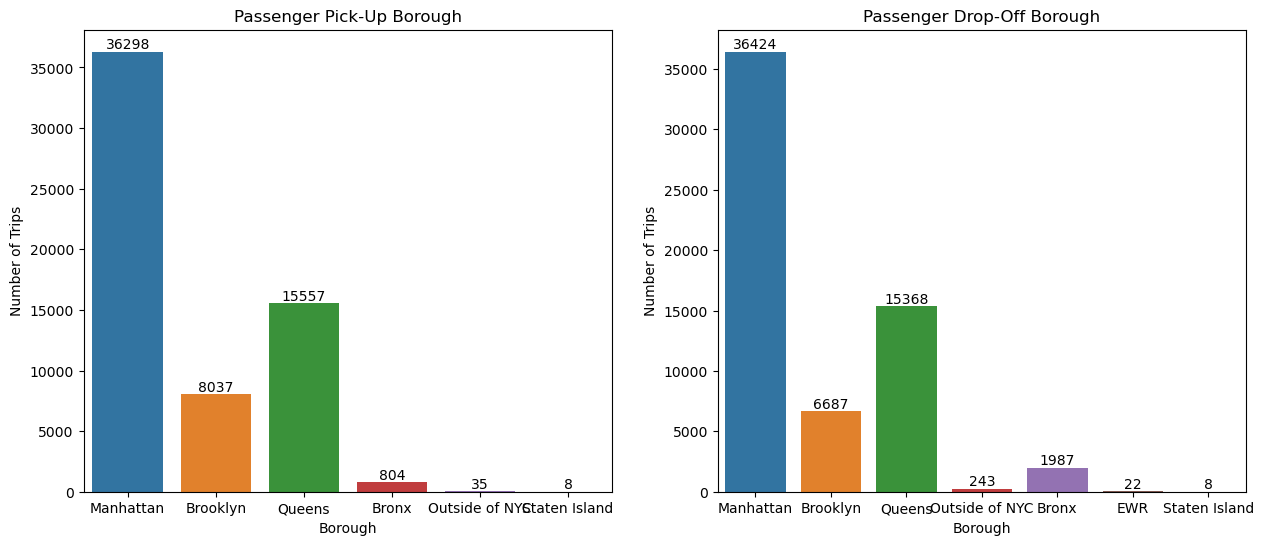

In [117]:
plt.figure(figsize =(15,6))

plt.subplot(1,2,1)
plt.title('Passenger Pick-Up Borough')
ax = sns.countplot(data=df,
              x='PUBorough')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xlabel('Borough')
plt.ylabel('Number of Trips')

plt.subplot(1,2,2)
plt.title('Passenger Drop-Off Borough')
ax = sns.countplot(data=df,
              x='DOBorough')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xlabel('Borough')
plt.ylabel('Number of Trips')

plt.show()

Based on graph above, we can have some insight regarding our passenger :
- The most popular pick-up location and drop-off location are from Manhattan Borough
- Unknown Borough means location outside of NYC. There are more taxi trips from NYC to outside of NYC rather than the opposite.
- While Manhattan and Queens have generally same number of trips between pick-up and drop-off, Brooklyn Borough have more trips starting from it than trips to it.
- The opposite also true for Bronx. Trips starting from Bronx is less than trips ending to Bronx.
- The least popular pick-up location and drop-off location are from Staten Island Borough

Manhattan being the most popular Borough in both pick-up location and drop-off location is not a strange thing because according to [World Population Review](https://worldpopulationreview.com/boroughs/manhattan-population), the borough has a population of 1.6 million which will increase to 3.9 million during weekdays due to commuters.

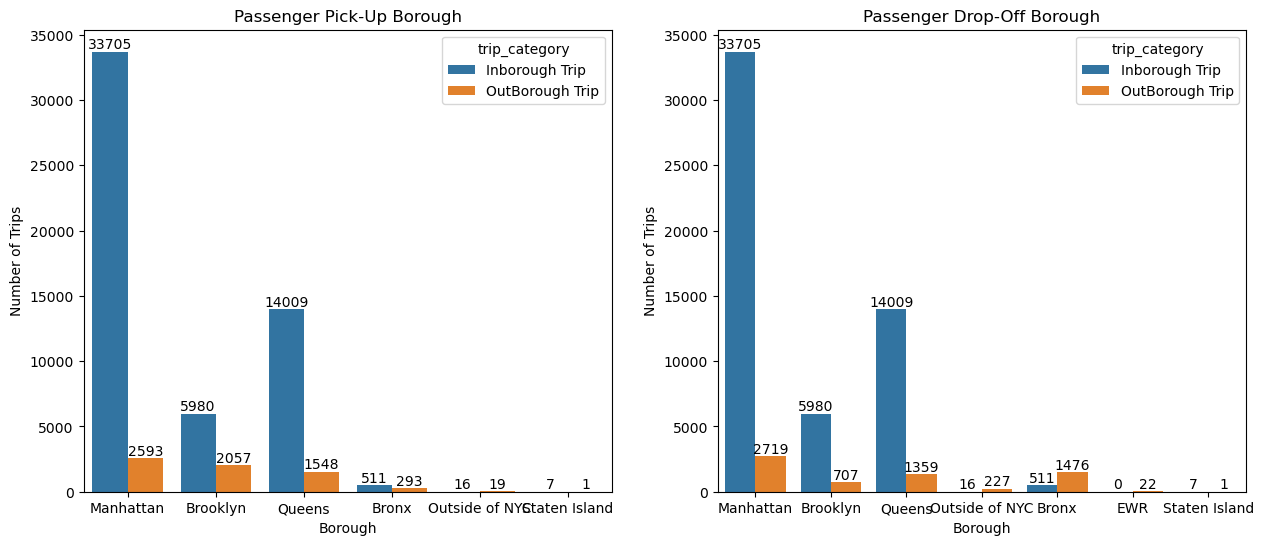

In [118]:
plt.figure(figsize =(15,6))

plt.subplot(1,2,1)
plt.title('Passenger Pick-Up Borough')
ax = sns.countplot(data=df,
              x='PUBorough', hue='trip_category')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xlabel('Borough')
plt.ylabel('Number of Trips')

plt.subplot(1,2,2)
plt.title('Passenger Drop-Off Borough')
ax = sns.countplot(data=df,
              x='DOBorough', hue='trip_category')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xlabel('Borough')
plt.ylabel('Number of Trips')

plt.show()

In [119]:
df[df['PUBorough'] == 'Brooklyn'][['PUBorough','DOBorough']].value_counts(), df[df['DOBorough'] == 'Brooklyn'][['PUBorough','DOBorough']].value_counts()

(PUBorough  DOBorough     
 Brooklyn   Brooklyn          5980
            Manhattan         1571
            Queens             435
            Outside of NYC      28
            Bronx               15
            EWR                  7
            Staten Island        1
 Name: count, dtype: int64,
 PUBorough       DOBorough
 Brooklyn        Brooklyn     5980
 Queens          Brooklyn      479
 Manhattan       Brooklyn      219
 Bronx           Brooklyn        6
 Outside of NYC  Brooklyn        2
 Staten Island   Brooklyn        1
 Name: count, dtype: int64)

In [120]:
df[df['PUBorough'] == 'Bronx'][['PUBorough','DOBorough']].value_counts(), df[df['DOBorough'] == 'Bronx'][['PUBorough','DOBorough']].value_counts()

(PUBorough  DOBorough     
 Bronx      Bronx             511
            Manhattan         251
            Queens             25
            Outside of NYC     11
            Brooklyn            6
 Name: count, dtype: int64,
 PUBorough       DOBorough
 Manhattan       Bronx        1422
 Bronx           Bronx         511
 Queens          Bronx          38
 Brooklyn        Bronx          15
 Outside of NYC  Bronx           1
 Name: count, dtype: int64)

Upon closer look between each group of `trip_category`, Brooklyn to Manhattan is significantly higher than Manhattan to Brooklyn. The same can be said for Bronx, Manhattan to Bronx is significantly higher than Bronx to Manhattan. This is the reason why there is a significant increase in both Outborough Trip.
- Insight that can be taken from these are, there might be more people who lives in Brooklyn and took taxi to work in Manhattan. And more people who work in Manhattan and took taxi to go home to Bronx.

#### **Passenger Preferred Pickup Zone and Dropoff Zone**
After knowing which are the popular Pickup Borough and Dropoff Borough, we can start analyzing deeper to see which is the most popular Pickup Zone and Dropoff Zone.

In [121]:
top_pickup = df.groupby(by='PUZone')['PUZone'].count().sort_values(ascending=False).head(10)
top_dropoff = df.groupby(by='DOZone')['DOZone'].count().sort_values(ascending=False).head(10)

In [122]:
top_pickup = pd.DataFrame(top_pickup)
top_dropoff = pd.DataFrame(top_dropoff)

In [123]:
top_pickup = top_pickup.rename(columns={'PUZone' : 'Number of Trips'}).reset_index()
top_dropoff = top_dropoff.rename(columns={'DOZone' : 'Number of Trips'}).reset_index()
top_pickup

,PUZone,Number of Trips
0,East Harlem North,12548
1,East Harlem South,8393
2,Morningside Heights,3570
3,Central Harlem,3535
4,Forest Hills,3521
5,Central Park,2728
6,Elmhurst,2676
7,Fort Greene,2056
8,Washington Heights South,1677
9,Astoria,1617


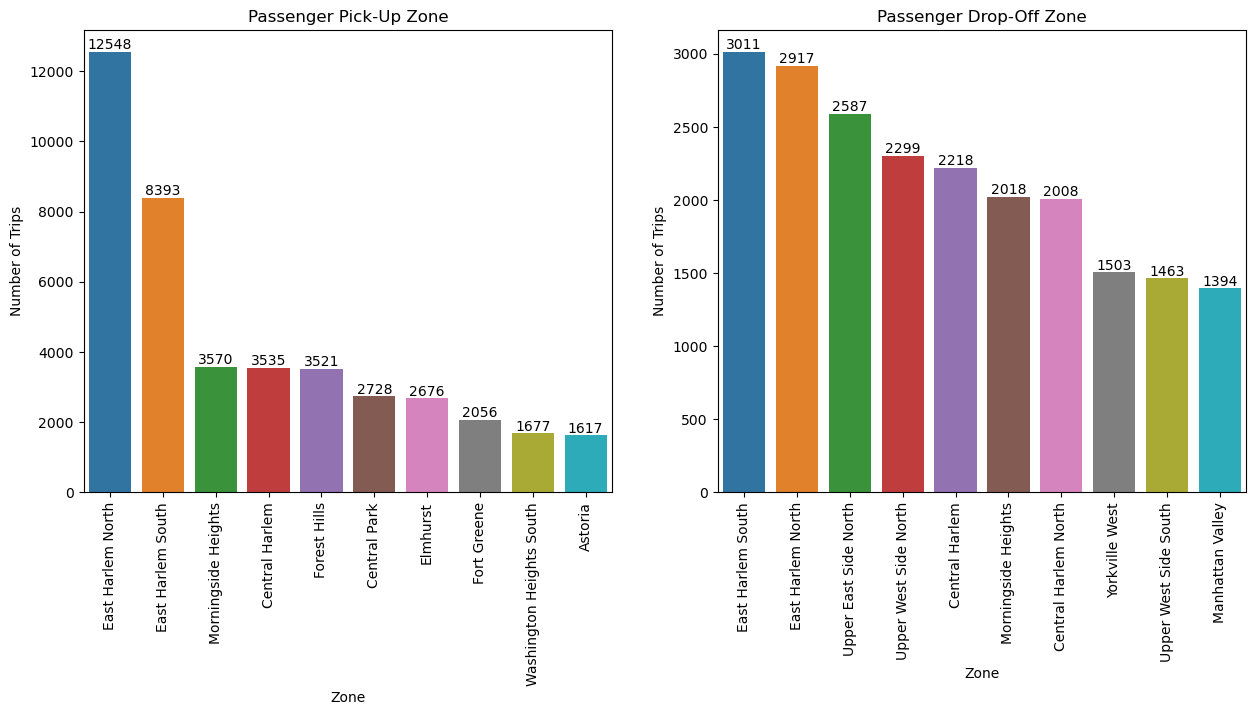

In [124]:
plt.figure(figsize =(15,6))

plt.subplot(1,2,1)
plt.title('Passenger Pick-Up Zone')
ax = sns.barplot(data=top_pickup,
              x='PUZone', y='Number of Trips')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xlabel('Zone')
plt.xticks(rotation= 90)
plt.ylabel('Number of Trips')

plt.subplot(1,2,2)
plt.title('Passenger Drop-Off Zone')
ax = sns.barplot(data=top_dropoff,
              x='DOZone', y='Number of Trips')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xlabel('Zone')
plt.xticks(rotation= 90)
plt.ylabel('Number of Trips')

plt.show()

According to graph above, there are some insight that can be taken :
- East Harlem North is the most preferred pick up zone, followed by East Harlem South, Morningside Heights, Central Harlem, and Forest Hills.
- East Harlem South is the most preferred drop off zone, followed by East Harlem North, Upper East Side North, Upper West Side North.
- Both East Harlem North and East Harlem South has the highest number of trips. Which means those two location are the most popular zone for our taxi services.

#### **Passenger Most Preferred Trip Route**
In this section, we will check if there is any favorite trip route using their respective Pickup Zone and Dropoff Zone

In [125]:
top_route = df.groupby(by=['PUZone','DOZone'])['PUZone'].count().sort_values(ascending=False).head(10)
top_route = pd.DataFrame(top_route).rename(columns={'PUZone' : 'Number of Trips'}).reset_index()
top_route['Route'] = top_route['PUZone'] + ' - ' + top_route['DOZone']
top_route = top_route[['Route', 'Number of Trips']]

In [126]:
top_route

,Route,Number of Trips
0,East Harlem North - East Harlem South,1943
1,East Harlem South - East Harlem North,1393
2,East Harlem North - Upper East Side North,1175
3,Forest Hills - Forest Hills,1003
4,East Harlem North - Morningside Heights,927
5,East Harlem North - Central Harlem,886
6,East Harlem North - Upper West Side North,689
7,East Harlem North - Central Harlem North,685
8,East Harlem North - Yorkville West,665
9,East Harlem North - Central Park,620


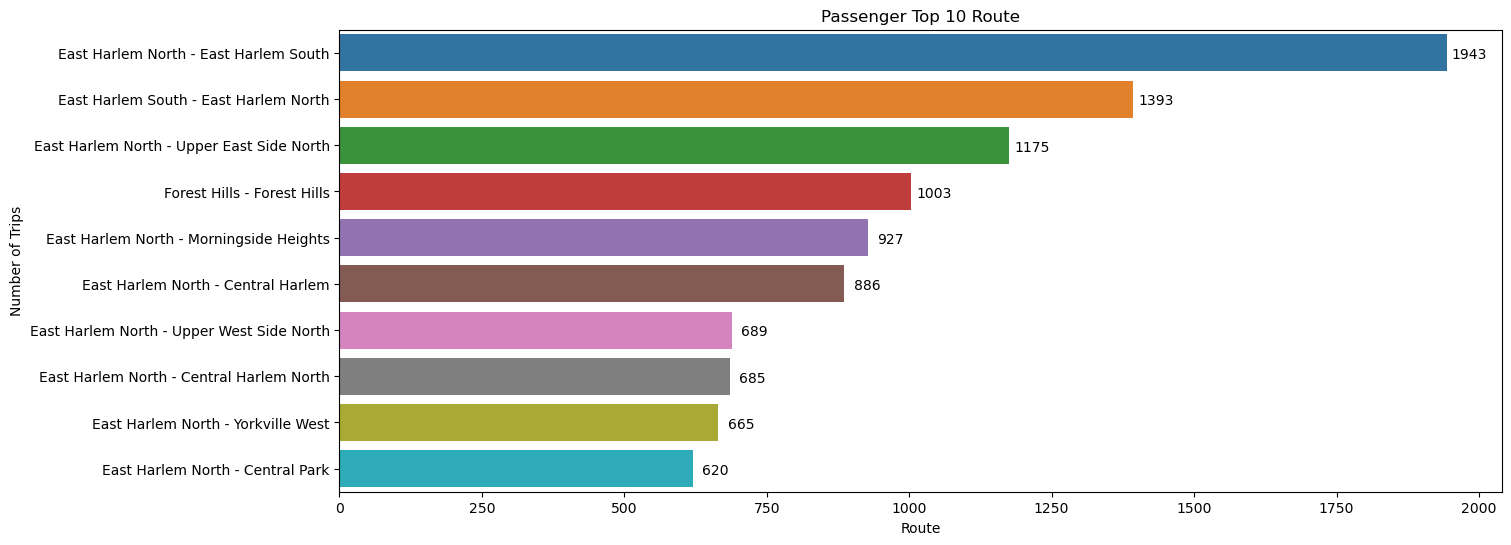

In [127]:
plt.figure(figsize =(15,6))
plt.title('Passenger Top 10 Route')
ax = sns.barplot(data=top_route,
              x='Number of Trips', y='Route')
for p in ax.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
plt.xlabel('Route')
plt.ylabel('Number of Trips');

According to graph above, there are some insight that can be taken :
- Top Taxi Route during January 2023 is from East Harlem North to East Harlem South with 1943 trips. Continued with trips to the opposite direction with a total of 1393 trips.
- 8 out of 10 Top Taxi Route are started from East Harlem North. This directly correlates with East Harlem North being the top pickup zone and Manhattan being the top pickup borough.

According to [Medium Article](https://medium.com/@NYCTLC/2018-a-year-of-trips-in-review-42acb8c201b9) by New York City TLC in 2018, Harlem was said to be busiest pick-ups and drop-offs area for green taxis. Adding the fact where a lot of trips in this dataset comes from green taxis or VFH based on `congestion_surcharge` fare, this further reinforces that most of the trip in this dataset comes from green taxis.

### **Passenger Preferred Number of Passenger**
In this section, we will check how many passenger rode taxi for each trips.

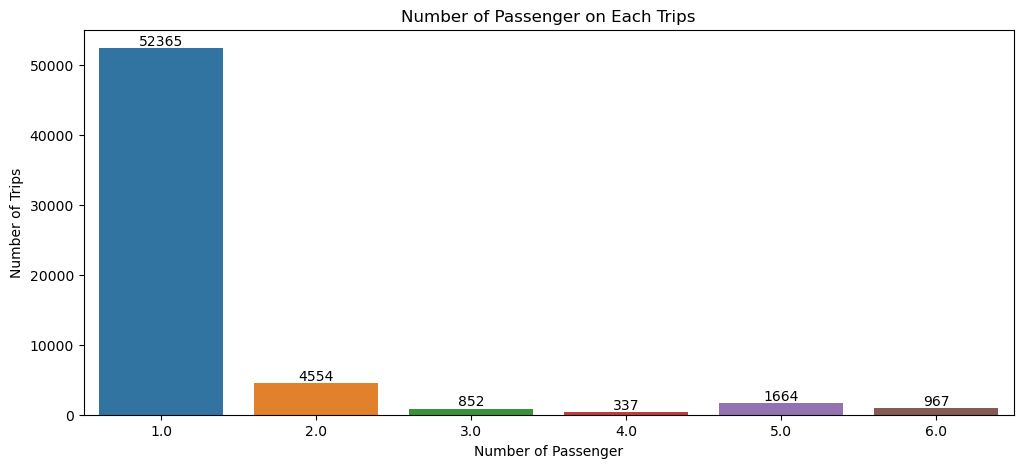

In [128]:
plt.figure(figsize =(12,5))
plt.title('Number of Passenger on Each Trips')
ax = sns.countplot(data=df,
              x='passenger_count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.xlabel('Number of Passenger')
plt.ylabel('Number of Trips')
plt.show()

According to the graph above, some insight can be taken :
- Most passenger prefers to take trips alone when riding taxi rather than in groups.
- Compared to other number of passenger who took trips in groups, A group of 4 has the least number of trips.

### **Passenger Preferred Payment Type**

In this section, payment type used by passenger for each trip will be analyzed to see which payment type are preferred by passenger. Payment type with popular demand will be used as a consideration for payment method.

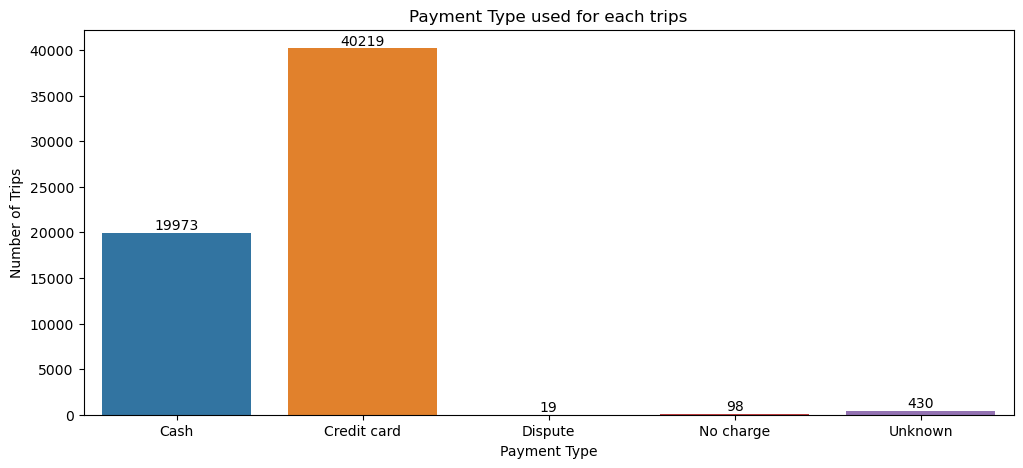

In [129]:
plt.figure(figsize =(12,5))
plt.title('Payment Type used for each trips')
ax = sns.countplot(data=df,
              x='payment_type')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()

According to graph above, there are some insights that can be taken :
- Most preferred payment type for each trips is credit card. Which doubles from payment by cash. This means passenger preferred cashless payment method over cash. We might be able to increase the number of choice for cashless method by adding e-wallet, or other cashless payment method.

### **Passenger Preferred Trip Type**
In this section, preferred trip type by passenger will be checked in order to identify most used trip type.

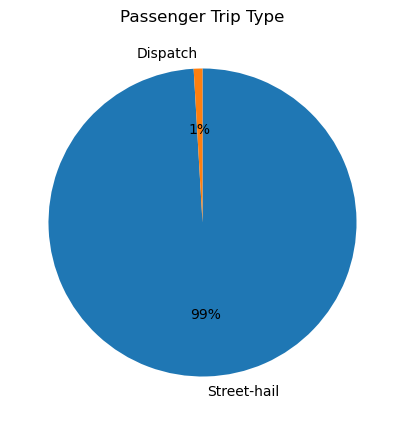

In [130]:
plt.figure(figsize =(12,5))
plt.title('Passenger Trip Type')

plt.pie(data=df,
        x=df['trip_type'].value_counts().values,
        labels=df['trip_type'].value_counts().index,
        autopct='%.0f%%',
        counterclock=False,
        startangle=90)

plt.show()

In [131]:
df[df['trip_type'] == 'Dispatch']['RatecodeID'].value_counts()

RatecodeID
Negotiated Fare          553
Nassau or Westchester      2
Standard Rate              2
JFK                        0
Newark                     0
Name: count, dtype: int64

According to the graph above, there are some insights that can be taken :
- 99% of the trips in January 2023 comes from street-hail. This mean almost all passenger rides taxi from street-hailing rather than using dispatch.
- Upon exploring Dispatch `trip_type`, most of Negotiated Fare comes when passenger are using dispatch.

### **Passenger Preferred Fare Rate**
In this section, passenger preferred fare rate used will be checked in order to identify most used fare rate.

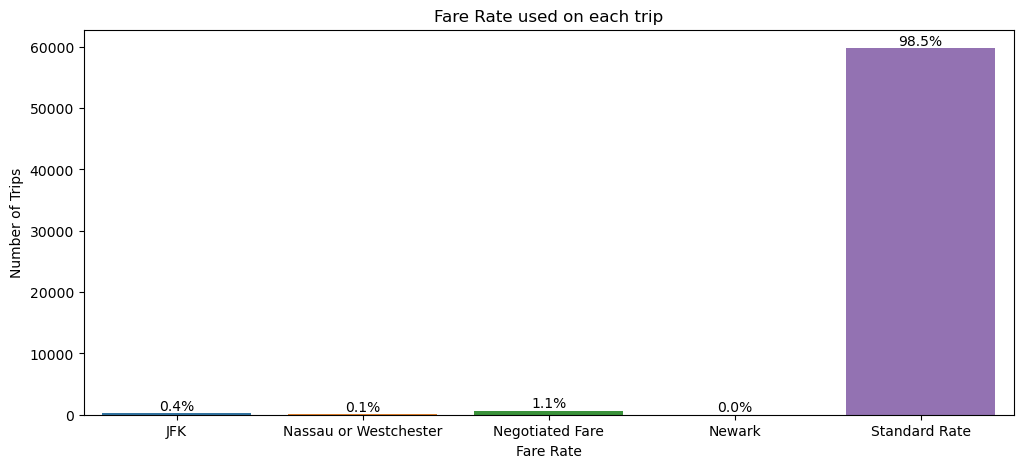

In [132]:
plt.figure(figsize =(12,5))
plt.title('Fare Rate used on each trip')
ax = sns.countplot(data=df,
              x='RatecodeID')

for p in ax.patches:
    ax.annotate(format(p.get_height()/len(df['RatecodeID'])*100, '.1f') + '%', (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.xlabel('Fare Rate')
plt.ylabel('Number of Trips')
plt.show()

According to the graph above, there is an insight that can be taken :
- 98.5% of trips in January 2023 uses Standard Fare Rate. This further reinforce the argument that most of the taxi trips in this dataset stays within New York City.

## **Correlation Analysis**

### **Correlation Between Taxi Fare and Trip Distance by Rate Type**
This section shows correlation between Fare and Trip Distance grouped by Taxi Fare Rate Type. 

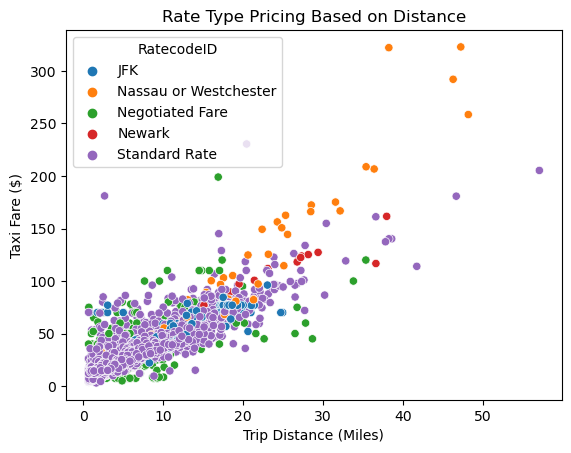

In [133]:
plt.title('Rate Type Pricing Based on Distance')
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='RatecodeID')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Taxi Fare ($)');

According to graph above, some insight can be taken :
- Standard taxi fare rate mostly populates short distance trip with low fare.
- Nassau or Westchester taxi fare populates long distance trip with high fare, because this is mostly for trips going outside new york city.
- Negotiated Fare populates short to medium distance trip with low fare.
- Newark taxi fare rate mostly populates medium distance trip with medium fare.
- JFK fare rate populates medium distance trip with medium fare.


### **Correlation Between Taxi Fare and Trip Distance by Trip Category**
This section shows correlation between Fare and Trip Distance grouped by Trip Category

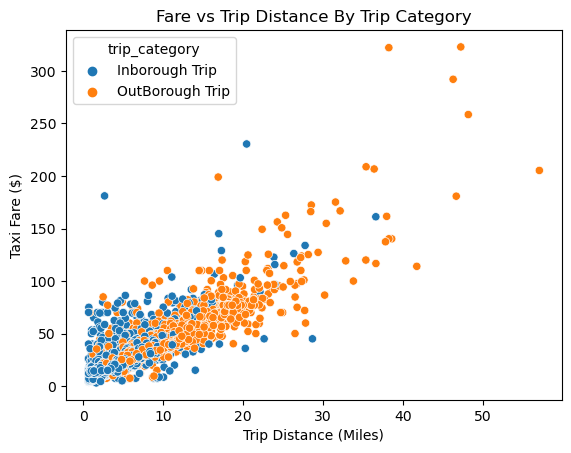

In [134]:
plt.title('Fare vs Trip Distance By Trip Category')
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='trip_category')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Taxi Fare ($)');

According to graph above, some insight can be taken :
- OutBorough Trip generally populates long distance trip with medium to high fare because this type of trips are trips from one borough to another borough.
- InBorough Trip populates short to medium distance trip with low to medium fare because the trip stays within one borough.

### **Correlation Between Taxi Fare and Trip Distance by Congestion**
This section shows correlation between Fare and Trip Distance grouped by Congestion, in order to see whether the trip encounter congestion or not.

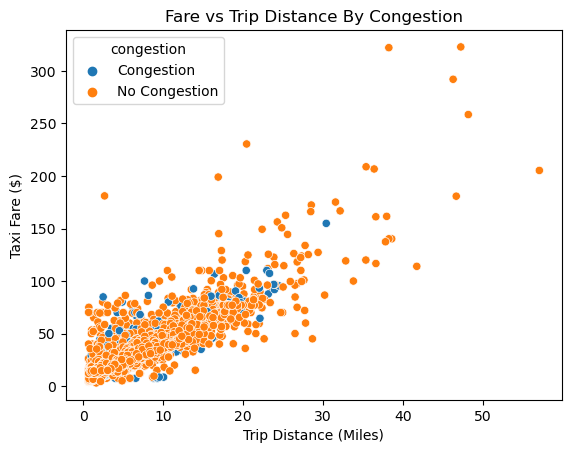

In [135]:
plt.title('Fare vs Trip Distance By Congestion')
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='congestion')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Taxi Fare ($)');

According to the graph above, some insight can be taken :
- Most of the trips that have congestion are medium distance trip. Which signifies congestion mostly happen within New York City.

### **Correlation Between Taxi Fare and Trip Distance by Tolls Amount**
This section shows correlation between Fare and Trip Distance grouped by Tolls Amount, in order to see which kind of trip passes through tolls.

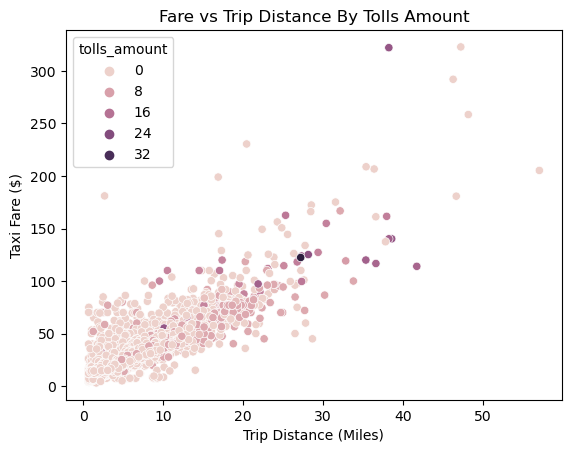

In [136]:
plt.title('Fare vs Trip Distance By Tolls Amount')
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='tolls_amount')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Taxi Fare ($)');

According to the graph above, some insight can be taken :
- Most of the trips that have passes through tolls are short to medium distance trip. But, there is no noticeable correlation because tolls are mostly according to road taken during the trip.

### **Correlation Between Taxi Fare and Trip Distance by Tip Amount**
This section shows correlation between Fare and Trip Distance grouped by Tip, in order to see whether there is a pattern where tip is given on each Trip

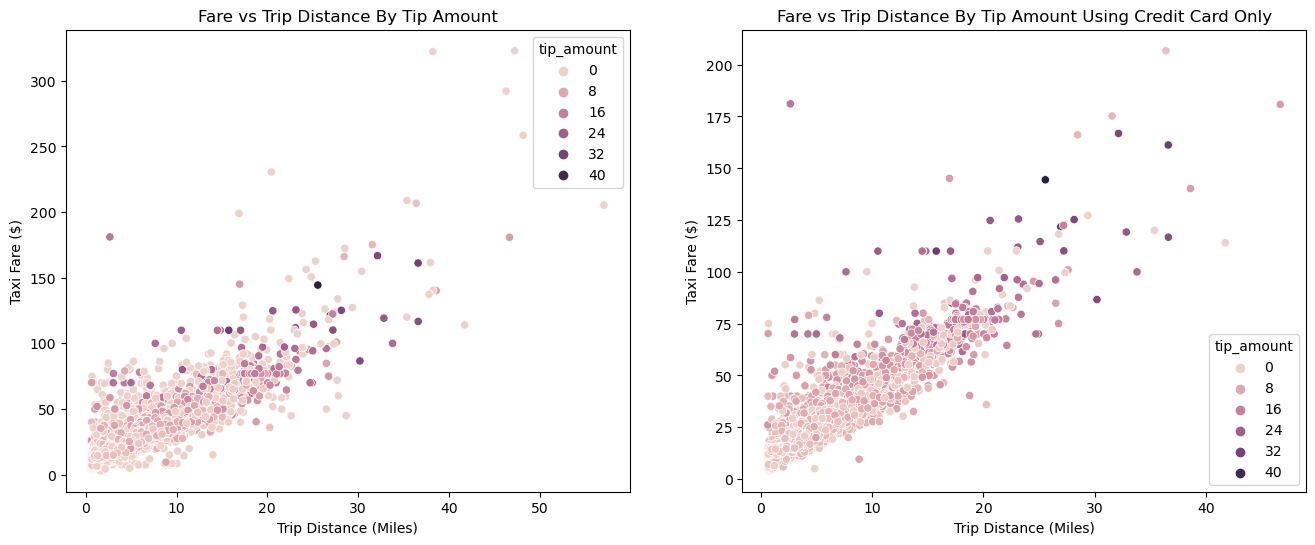

In [137]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Fare vs Trip Distance By Tip Amount')
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='tip_amount')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Taxi Fare ($)');

plt.subplot(1,2,2)
plt.title('Fare vs Trip Distance By Tip Amount Using Credit Card Only')
sns.scatterplot(data=df[df['payment_type'] == 'Credit card'], x='trip_distance', y='fare_amount', hue='tip_amount')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Taxi Fare ($)');

According to the graph above, some insight can be taken :
- The amount of tip given by passenger mostly correlates with the trip distance and taxi fare where higher trip distance and taxi fare means higher tip. But, because this dataset doesn't include cash tip, so the real situation might be different. 

## **Conclusion & Recommendation**

### **Conclusion** :

*Trip Day Preference*
- Overview day trends within January shows a repeating pattern where number of trips on Sunday is noticeably lower than other period of day. This might happened because they prefers other method of transportation that have lower fare because they are not constrained by time during weekend.
- Overall Passenger prefers taking taxi for trips during Weekday rather than Weekend. This might happened because most of our passengers are from people who wanted to go home after finishing their work. This assumption is made because our overall peak hour happened during after work hours.
- Passenger from Brooklyn Borough prefers taking taxi for trips during Weekend rather than Weekday.
- Passenger from Queens doesn't have any preferred day to take taxi for trips.

*Trip Hour Preference*
- Overall Peak Hour for taxi services starts from 15:00 until 18:59, while Low Hour for taxi services starts from 00:00 until 05:59. Low Hour taxi services that starts after midnight is normal, considering during that time, most of the people are already at their own home, therefore not needing any transportation service. But, Overnight taxi services are still important because even if the price is higher than normal fare, it is one of the available transportation service during early morning that provides safe transportation.
- Passenger from Bronx have Peak Hour for taxi service from 10:00 until 14:59, while Low Hour still the same as Overall.
- Median taxi fare during peak time doesn't have any noticable difference than other timeframe nears it. This concludes that there is no additional fare charged by our taxi services during peak time period.
 
*Trip Location Preference*
- 89% of total Passenger in January prefers to use taxi for Inborough Trips rather than Outborough Trips. This signifies that taxi fleet will mostly stay within their Borough throughout the day. This will made distributing taxi easier since we can divide it according to each Borough demands.
- Manhattan is the most popular Borough for both Pickup Location and Dropoff Location, while Staten Island is the least popular Borough for both Pickup Location and Dropoff Location.
- East Harlem North is the most popular Zone for Pickup Location while East Harlem South is the most popular Zone for Dropoff Location.
- Top Taxi Route during January 2023 is from East Harlem North to East Harlem South. Followed by trips to the opposite direction, from East Harlem South to East Harlem North. A plausible reason as of why top taxi route comes from Harlem, is because according to [World Population Review](https://worldpopulationreview.com/boroughs/manhattan-population), Harlem neighbourhood suffers from many problem and a third of it's population still receive income support from goverment. This signifies that the crime rate within the area is high and therefore it is a lot safer to take a taxi trip to go home.

*Passenger Preference*
- Passenger prefers to ride taxi alone than taking a ride in groups.
- The most dominant payment method used by passenger is Credit Card followed by Cash. This might be because cashless payment method is more convenient for passenger rather than having to bring cash on hand.
- Most Passenger prefers street-hailing taxi than calling a taxi for a dispatch. This might be because there are a lot of taxi which is readily available by street hailing and therefore reduce the needs to call for a dispatch.
- Most Passenger prefers riding taxi with Standard Fare Rate. Which means, most passenger are using taxis for trips within New York City rather than to outside of the city.


### **Recommendation** :
*Taxi Scheduling*
- Increase Allocation of taxis during weekday to accomodate the increase of demand during weekday. In case of Brooklyn Borough, taxis should be allocated more during weekend.
- During Peak Hour (15:00-18:59), Taxi should be ready to pick-up passenger in popular pick-up zone to maximize the profit gained from increased taxi trips demand.

*Taxi Location*
- Because most of the passenger prefers InBorough Trips, we can allocate taxi fleet according to each Borough demand in order to keep up with the demand within that Borough.
- Increase Allocation of taxis to Manhattan Borough that have high number of trips, especially to East Harlem North and East Harlem South.
- Re-evaluate the demand of taxi for Staten Island and Map the need of taxis in that Borough to increase the effectiveness of our taxi fleet.

*Operational*
- Knowing that Passenger prefer to ride taxi alone, we will need to increase the quality of our services from cleanliness of the car for passenger comfort, and increase the quality of our call services in order to ensure the safety of our passenger.
- Knowing that payment method using credit card is more dominant than cash, Increasing other cashless payment method for our taxi trip will increase passenger convenience when paying fares. Therefore, passenger satisfaction can be increased.
- Re-evaluate the procedure to call taxis using dispatch. We need to find out why most people still prefer to street hails than using dispatch services.

*Marketing & Promotion*
- To maximize our profit, we should charge an additional fare for trips taken during peak time and around busy area. Even if the price increased, passenger will have no other choice but to use our taxi services since they will be needing the ride.
